# Problem 1
Build an Explicit Direct Step (Moglen’s Standard Step) GVF solver, and test
your developed code or spreadsheet using example problem 6.1 in the text.
Show that your solver gives the same results as those shown in figure 6.4.
Make your code or spreadsheet applicable for a trapezoidal or rectangular
cross section. That is, do not limit it to a rectangular cross section.

**Example 6.1**

In Example 5.1 we analyzed a 10 m wide rectangular channel carrying a discharge of 30 m3/s, with a channel slope of 0.005 m/m, 
and Manning’s roughness is 0.030. We determined that the normal 
and critical depths were y0 = 1.26 m and yc = 0.97 m, respectively. 
Therefore, the reach is mild.

    a. Determine the length of the M2 curve that varies over the entire depth distance between yc and y0.
    
    b.  Make a plot of this curve showing also the channel bottom, and yc and y0 over the full length of this profile.
    
    c.  Examine the sensitivity of the length calculation in part (a) to
            i. The depth increment used in the application of equation 6.3
            ii. A small variation in the bounding depth near yc
            iii. A small variation in the bounding depth near y0
            
    d.  Use your results from sensitivity analysis in part (c) to provide guidance on calculation of surface water profiles with this method.

## 1a. Determine the length of the M2 curve that varies over the entire depth distance between yc and y0.

In [400]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, newton

#=============================#
#           Inputs            #
#=============================#
Q = 30
S_o = 0.005
n = 0.030
b = 10
m = 0 #input 0 if rectangular

g = 9.81
if g > 10:
    k = 1.486
else:
    k = 1
#=============================#
#                             #
#=============================#

################
# Normal Depth #
################
def manning(y, Q, b, S_o, n, k, m):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        R = b*y / (b + 2*y)
    else:
        R = A / (b + 2*m*y * (1 + m**2)**(1/2))
    return Q - (k/n) * A * R**(2/3) * S_o**(1/2)

y_o = fsolve(manning, 1, args=(Q, b, S_o, n, k, m))

##################
# Critical Depth #
##################
def crit(y):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        T = b
    else:
        T = b + 2*m*y
    return Q/np.sqrt(g*A**3/T) - 1
y_c = newton(crit, 0.2)

#######################
# Boundary Conditions #
#######################
y_up = 1.2619
y_dwn = 0.9717

# y_up = y_o[0]
# y_dwn = y_c + 0.0001

######################
# Profile Generation #
######################
#N = 200
#y = np.linspace(y_dwn, y_up, N)

N = 8
y = np.array([y_dwn, 1, 1.05, 1.1, 1.15, 1.2, 1.25, y_up])

dx = np.zeros(N-1)
x = np.zeros(N)

#Defining area as rec or trap
if m==0:
    A = b * y
else:
    A = (b + m*y) * y

#Defining R as rec or trap
if m==0:
    R = b*y / (b + 2*y)
else:
    R = A / (b + 2*m*y * (1 + m**2)**(1/2))

S_f = (Q*n / (k * A * R**(2/3)))**2
E = y + Q**2 / (2 * g * A**2)

dx = (E[1:] - E[:-1]) / (S_o - 0.5 * (S_f[1:] + S_f[:-1])) #populate dx
x_o = 0 #starting point
x[0] = 0 #initialize
x[1:] = dx
x = np.cumsum(x)

print('Length of M2 Curve (m in - direction)=', np.around(-1 * x[-1], decimals=2))

Length of M2 Curve (m in - direction)= 136.11


## 1b. Make a plot of this curve showing also the channel bottom, and yc and y0 over the full length of this profile.

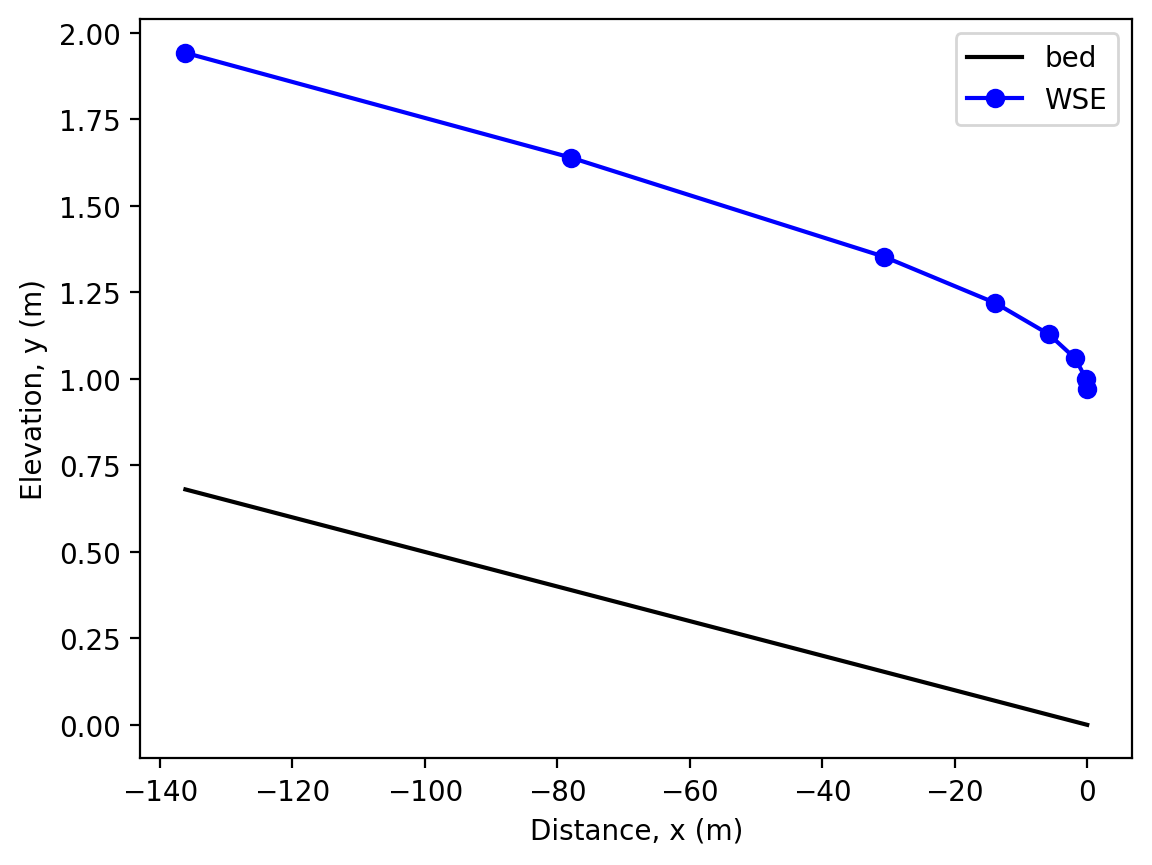

In [401]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, newton

#=============================#
#           Inputs            #
#=============================#
Q = 30
S_o = 0.005
n = 0.030
b = 10
m = 0 #input 0 if rectangular

g = 9.81
if g > 10:
    k = 1.486
else:
    k = 1
#=============================#
#                             #
#=============================#

################
# Normal Depth #
################
def manning(y, Q, b, S_o, n, k, m):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        R = b*y / (b + 2*y)
    else:
        R = A / (b + 2*m*y * (1 + m**2)**(1/2))
    return Q - (k/n) * A * R**(2/3) * S_o**(1/2)

y_o = fsolve(manning, 1, args=(Q, b, S_o, n, k, m))

##################
# Critical Depth #
##################
def crit(y):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        T = b
    else:
        T = b + 2*m*y
    return Q/np.sqrt(g*A**3/T) - 1
y_c = newton(crit, 0.2)

#######################
# Boundary Conditions #
#######################
y_up = 1.2619
y_dwn = 0.9717

# y_up = y_o[0]
# y_dwn = y_c + 0.0001

######################
# Profile Generation #
######################
#N = 200
#y = np.linspace(y_dwn, y_up, N)

N = 8
y = np.array([y_dwn, 1, 1.05, 1.1, 1.15, 1.2, 1.25, y_up])

dx = np.zeros(N-1)
x = np.zeros(N)

#Defining area as rec or trap
if m==0:
    A = b * y
else:
    A = (b + m*y) * y

#Defining R as rec or trap
if m==0:
    R = b*y / (b + 2*y)
else:
    R = A / (b + 2*m*y * (1 + m**2)**(1/2))

S_f = (Q*n / (k * A * R**(2/3)))**2
E = y + Q**2 / (2 * g * A**2)
dx = (E[1:] - E[:-1]) / (S_o - 0.5 * (S_f[1:] + S_f[:-1])) #populate dx
x_o = 0 #starting point
x[0] = 0 #initialize
x[1:] = dx
x = np.cumsum(x)

########
# Plot #
########
eta = -x * S_o
WSE = eta + y

plt.plot(x,eta, 'k-', label='bed')
plt.plot(x,WSE, linestyle='-', marker='o', color='b', label='WSE')
plt.legend()
plt.ylabel('Elevation, y (m)')
plt.xlabel('Distance, x (m)')
plt.show()

## 1c. Examine the sensitivity of the length calculation in part (a) to

## 1ci. The depth increment used in the application of equation 6.3

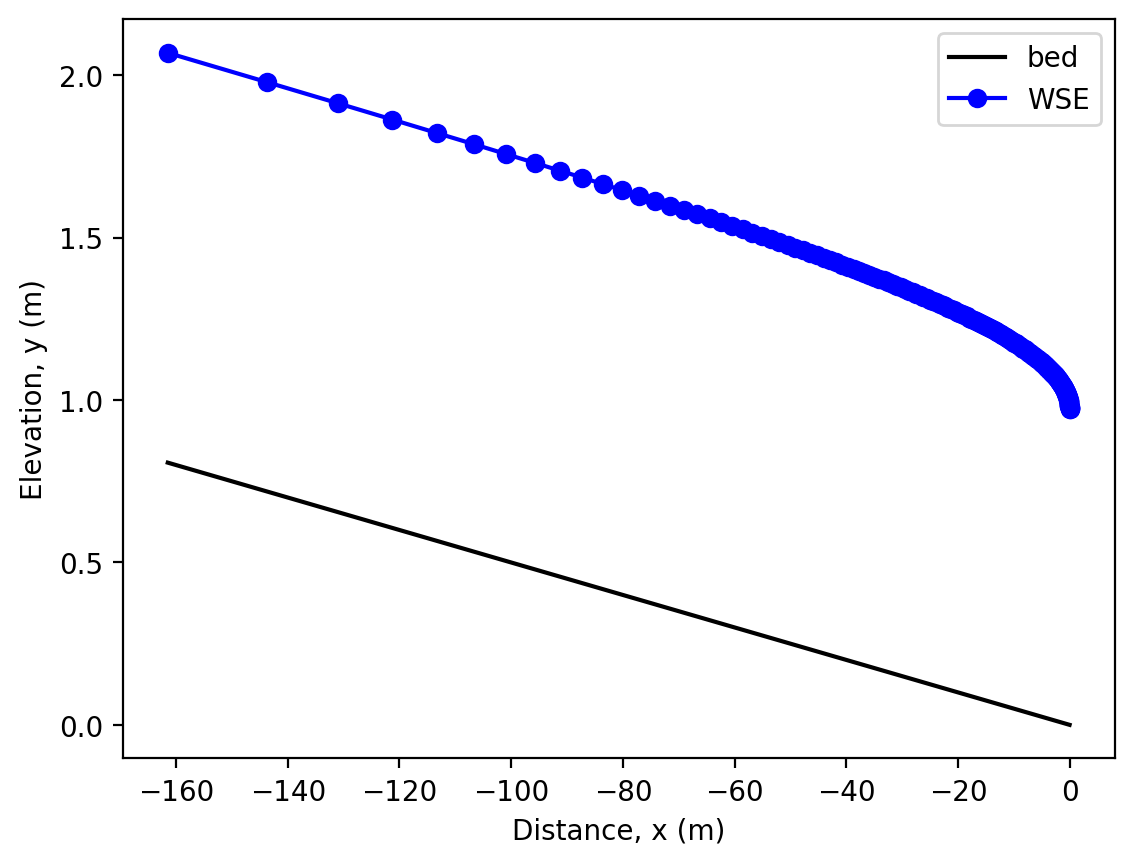

In [402]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, newton

#=============================#
#           Inputs            #
#=============================#
Q = 30
S_o = 0.005
n = 0.030
b = 10
m = 0 #input 0 if rectangular

g = 9.81
if g > 10:
    k = 1.486
else:
    k = 1
#=============================#
#                             #
#=============================#

################
# Normal Depth #
################
def manning(y, Q, b, S_o, n, k, m):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        R = b*y / (b + 2*y)
    else:
        R = A / (b + 2*m*y * (1 + m**2)**(1/2))
    return Q - (k/n) * A * R**(2/3) * S_o**(1/2)

y_o = fsolve(manning, 1, args=(Q, b, S_o, n, k, m))

##################
# Critical Depth #
##################
def crit(y):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        T = b
    else:
        T = b + 2*m*y
    return Q/np.sqrt(g*A**3/T) - 1
y_c = newton(crit, 0.2)

#######################
# Boundary Conditions #
#######################
y_up = 1.2619
y_dwn = 0.9717

yu = y_o[0]
yd = y_c + 0.0001

######################
# Profile Generation #
######################
N = 200
y = np.linspace(y_dwn, y_up, N)

# N = 8
# y = np.array([y_dwn, 1, 1.05, 1.1, 1.15, 1.2, 1.25, y_up])

dx = np.zeros(N-1)
x = np.zeros(N)

#Defining area as rec or trap
if m==0:
    A = b * y
else:
    A = (b + m*y) * y

#Defining R as rec or trap
if m==0:
    R = b*y / (b + 2*y)
else:
    R = A / (b + 2*m*y * (1 + m**2)**(1/2))

S_f = (Q*n / (k * A * R**(2/3)))**2
E = y + Q**2 / (2 * g * A**2)
dx = (E[1:] - E[:-1]) / (S_o - 0.5 * (S_f[1:] + S_f[:-1])) #populate dx
x_o = 0 #starting point
x[0] = 0 #initialize
x[1:] = dx
x = np.cumsum(x)

########
# Plot #
########
eta = -x * S_o
WSE = eta + y

plt.plot(x,eta, 'k-', label='bed')
plt.plot(x,WSE, linestyle='-', marker='o', color='b', label='WSE')
plt.legend()
plt.ylabel('Elevation, y (m)')
plt.xlabel('Distance, x (m)')
plt.show()

## 1cii. A small variation in the bounding depth near yc

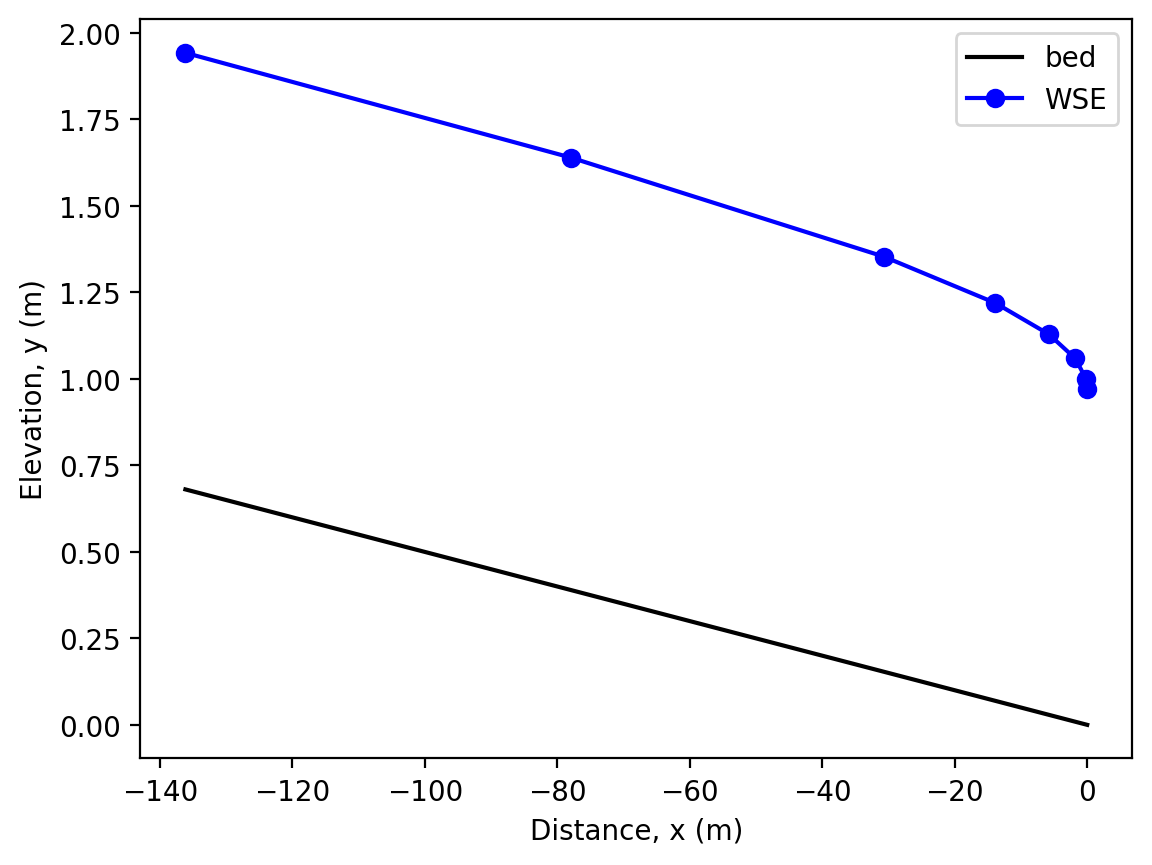

In [403]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, newton

#=============================#
#           Inputs            #
#=============================#
Q = 30
S_o = 0.005
n = 0.030
b = 10
m = 0 #input 0 if rectangular

g = 9.81
if g > 10:
    k = 1.486
else:
    k = 1
#=============================#
#                             #
#=============================#

################
# Normal Depth #
################
def manning(y, Q, b, S_o, n, k, m):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        R = b*y / (b + 2*y)
    else:
        R = A / (b + 2*m*y * (1 + m**2)**(1/2))
    return Q - (k/n) * A * R**(2/3) * S_o**(1/2)

y_o = fsolve(manning, 1, args=(Q, b, S_o, n, k, m))

##################
# Critical Depth #
##################
def crit(y):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        T = b
    else:
        T = b + 2*m*y
    return Q/np.sqrt(g*A**3/T) - 1
y_c = newton(crit, 0.2)

#######################
# Boundary Conditions #
#######################
y_up = 1.2619
y_dwn = y_c + 0.00001

######################
# Profile Generation #
######################
#N = 200
#y = np.linspace(y_dwn, y_up, N)

N = 8
y = np.array([y_dwn, 1, 1.05, 1.1, 1.15, 1.2, 1.25, y_up])

dx = np.zeros(N-1)
x = np.zeros(N)

#Defining area as rec or trap
if m==0:
    A = b * y
else:
    A = (b + m*y) * y

#Defining R as rec or trap
if m==0:
    R = b*y / (b + 2*y)
else:
    R = A / (b + 2*m*y * (1 + m**2)**(1/2))

S_f = (Q*n / (k * A * R**(2/3)))**2
E = y + Q**2 / (2 * g * A**2)
dx = (E[1:] - E[:-1]) / (S_o - 0.5 * (S_f[1:] + S_f[:-1])) #populate dx
x_o = 0 #starting point
x[0] = 0 #initialize
x[1:] = dx
x = np.cumsum(x)

########
# Plot #
########
eta = -x * S_o
WSE = eta + y

plt.plot(x,eta, 'k-', label='bed')
plt.plot(x,WSE, linestyle='-', marker='o', color='b', label='WSE')
plt.legend()
plt.ylabel('Elevation, y (m)')
plt.xlabel('Distance, x (m)')
plt.show()

## 1ciii. A small variation in the bounding depth near y0

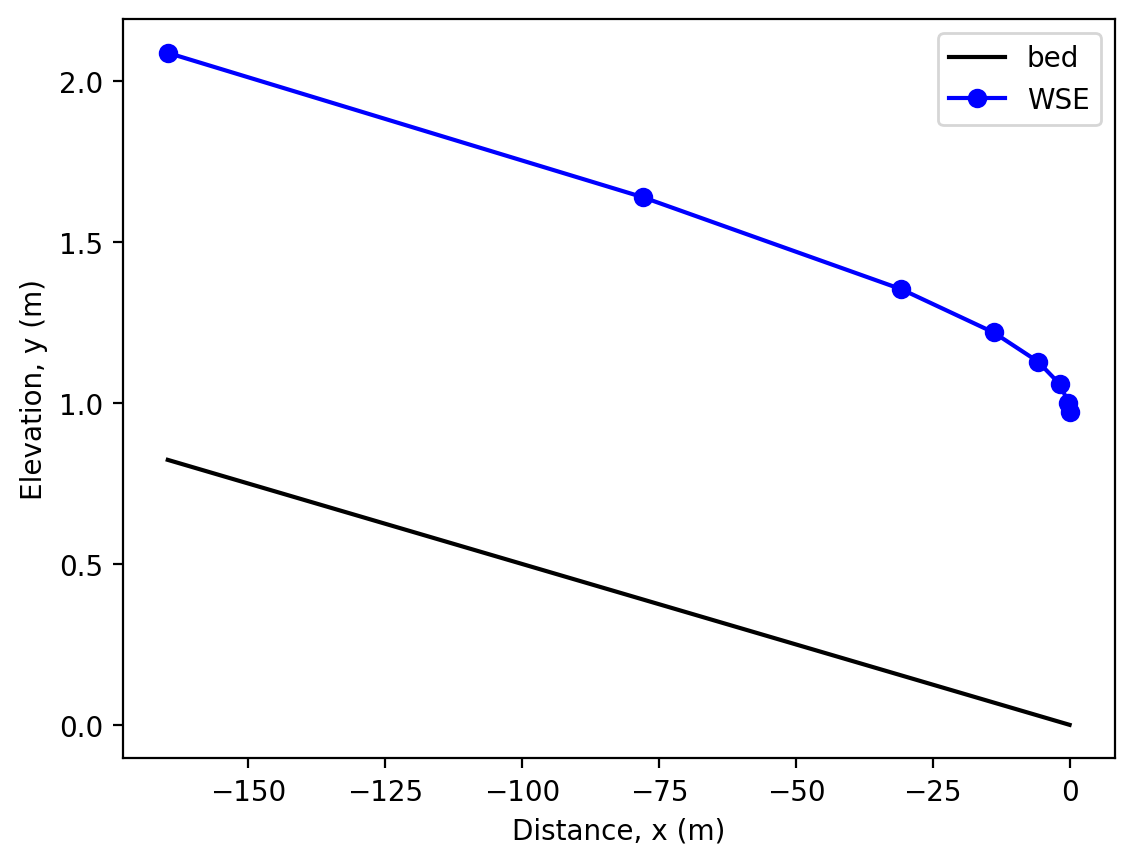

In [413]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, newton

#=============================#
#           Inputs            #
#=============================#
Q = 30
S_o = 0.005
n = 0.030
b = 10
m = 0 #input 0 if rectangular

g = 9.81
if g > 10:
    k = 1.486
else:
    k = 1
#=============================#
#                             #
#=============================#

################
# Normal Depth #
################
def manning(y, Q, b, S_o, n, k, m):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        R = b*y / (b + 2*y)
    else:
        R = A / (b + 2*m*y * (1 + m**2)**(1/2))
    return Q - (k/n) * A * R**(2/3) * S_o**(1/2)

y_o = fsolve(manning, 1, args=(Q, b, S_o, n, k, m))

##################
# Critical Depth #
##################
def crit(y):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        T = b
    else:
        T = b + 2*m*y
    return Q/np.sqrt(g*A**3/T) - 1
y_c = newton(crit, 0.2)

#######################
# Boundary Conditions #
#######################
y_dwn = 0.9717

y_up = y_o[0]

######################
# Profile Generation #
######################
#N = 200
#y = np.linspace(y_dwn, y_up, N)

N = 8
y = np.array([y_dwn, 1, 1.05, 1.1, 1.15, 1.2, 1.25, y_up])

dx = np.zeros(N-1)
x = np.zeros(N)

#Defining area as rec or trap
if m==0:
    A = b * y
else:
    A = (b + m*y) * y

#Defining R as rec or trap
if m==0:
    R = b*y / (b + 2*y)
else:
    R = A / (b + 2*m*y * (1 + m**2)**(1/2))

S_f = (Q*n / (k * A * R**(2/3)))**2
E = y + Q**2 / (2 * g * A**2)
dx = (E[1:] - E[:-1]) / (S_o - 0.5 * (S_f[1:] + S_f[:-1])) #populate dx
x_o = 0 #starting point
x[0] = 0 #initialize
x[1:] = dx
x = np.cumsum(x)

########
# Plot #
########
eta = -x * S_o
WSE = eta + y

plt.plot(x,eta, 'k-', label='bed')
plt.plot(x,WSE, linestyle='-', marker='o', color='b', label='WSE')
plt.legend()
plt.ylabel('Elevation, y (m)')
plt.xlabel('Distance, x (m)')
plt.show()

## 1d.  Use your results from sensitivity analysis in part (c) to provide guidance on calculation of surface water profiles with this method.

Looking at the results from part c i, ii, and iii, it appears that changing the nnumber of calculation steps and the precision of which the normal depth (upstream boundary condition) have the greatest effect on the precision of the profile calculation. Since the profile that is being analysied is a M2 profile the WSE will approach the normal depth (up stream boundary condition) asymptotically and will approach the crittical depth (down stream boundary condition) abruptly. Therefore the conclusions on the sensitvity analysis can be drawn:

**ci.**

    - Changing the number of calculation steps will have a great impact on the profile generation
    - Changing the calculation steps allows for more computational steps that are closer to the upstream boundary condition
    -Result: modle is **more precise** because the smaller computational intervals give values closer to the calculated normal depth and provides a better estimate of the upstream boundary condition

**cii.**

    - Downstream boundary condition is reached quickly (critical depth) and computation steps are not as important for precision in x plain
    - Changing the precision of the downstream boundary condition (critical) is **not as relevant** to the precision of model
    
**ciii.**

    - Giving a precise y (normal depth) value for the x bounds results in a large impact on the distance to the upstream boundary
    -Result: model is **more precise** because the upstream boundary condition reflects the "end/start" condition of the asymptotic "approach" (digression) from the normal depth towards the critical depth on the M2 curve
    

**Additional Notes**

    - it is important to condider the significance of the figures calculated normal depth in this example. While the results might be "more precise", they represent a theoretical maximum extent of the system. This should be considered when looking at the system as a whole, the "impact to the upstream boundary condition" technically occurs around 160 meters upstream but this could be considered negligable due to the asymptotic approach resulting in 140 meters upstream possibly providing a better estimate. This can be seen in the graph below:

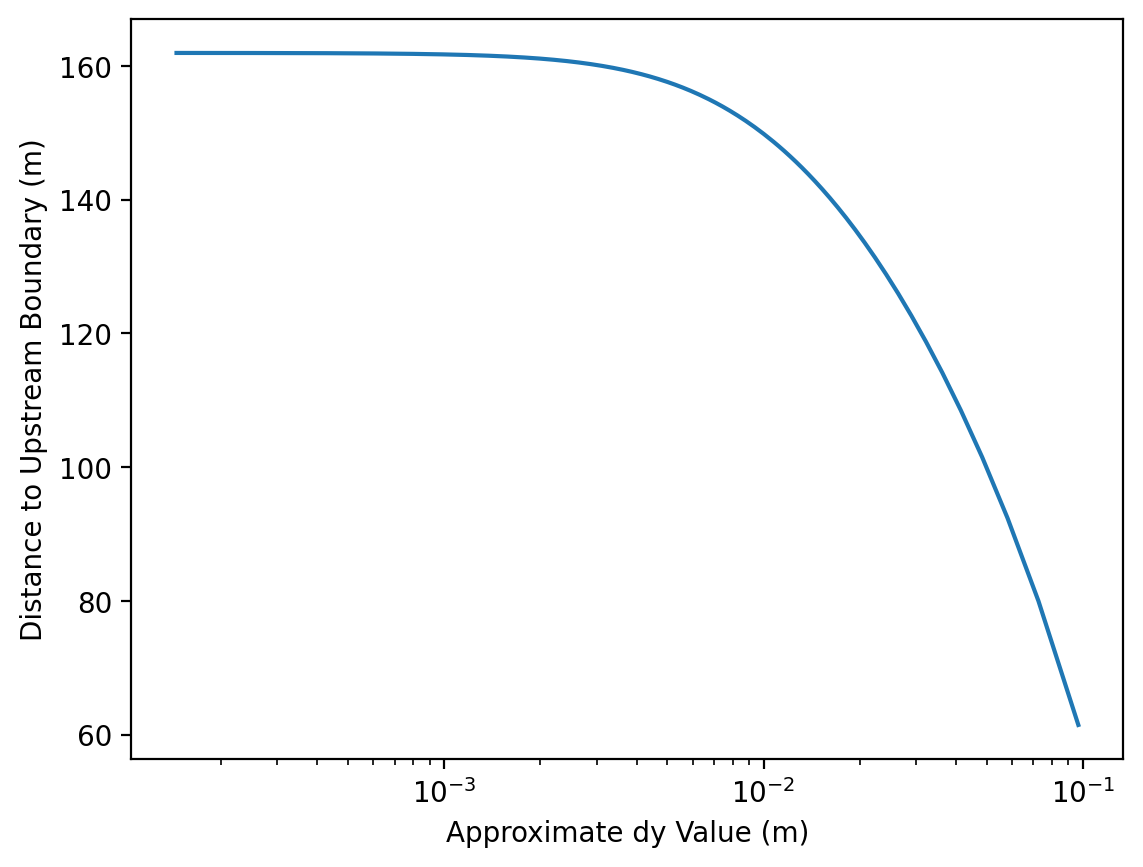

In [423]:
Nmin = 3
Nmax = 2000

y_up = 1.2619
y_dwn = 0.9717

dist = np.zeros(Nmax - Nmin + 1)
ynum = np.arange(Nmin, Nmax + 1)
dxx = np.zeros(Nmax - Nmin + 1)

if g>10:
    k = 1.486
else:
    k = 1

for i in range(Nmin,Nmax +1):
    N = i
    y = linspace(y_dwn, y_up, N)
    dx = np.zeros(N-1)
    x = np.zeros(N)
    
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y 
    if m==0:
        R = b*y / (b + 2*y)
    else:
        R = A / (b + 2*m*y * (1 + m**2)**(1/2))
    S_f = (Q*n / (k * A * R**(2/3)))**2
    E = y + Q**2 / (2 * g * A**2)
    
    dx = (E[1:] - E[:-1]) / (S_o - 0.5 * (S_f[1:] + S_f[:-1])) #populate dx
    x_o = 0 #starting point
    x[0] = 0 #initialize
    x[1:] = dx
    x = np.cumsum(x)
    
    ynum[i-Nmin]=i
    dist[i-Nmin]=x[N-1]
    
yres=abs(y_up - y_dwn)/ynum
plt.plot(yres, abs(dist))
plt.xlabel('Approximate dy Value (m)')
plt.ylabel('Distance to Upstream Boundary (m)')
plt.xscale('log')

---

# Problem 2
Build an Implicit Direct Step (Moglen’s Iterative Standard Step) GVF solver,
and test your developed code or spreadsheet using example problem 6.2 in
the text. Show that your solver gives the y and x pairings listed in Table 6.4
for x = 0.3, 1, 10, 50, and 100. Make your code or spreadsheet applicable
for a trapezoidal or rectangular

We return to Example 6.1 with a 10 m wide rectangular channel carrying a discharge of 30 m3/s, with a channel slope of 0.005 m/m, and 
Manning’s roughness is 0.030. Determine the depths along the M2 profile at the following locations: x = –0.1 m, –0.2 m, –0.3 m, –0.4 m, –0.5 m, 
–1.0 m, –2.0 m, –5.0 m, –10 m, –20 m, –30 m, –40 m, –50 m, –100 m, 
and –140 m.

    a. Present the table generated for the requested depths and compare to information in Table 6.1.
    
    b.  Describe the differences in approach and effort behind the standard step method when using y to determine x (as done in Example 6.1) and the standard step method when using x to determine y (as done in this example).

## 2a. Present the table generated for the requested depths and compare to information in Table 6.1.

Distance to the upstream boundary condition (m)= -140.0


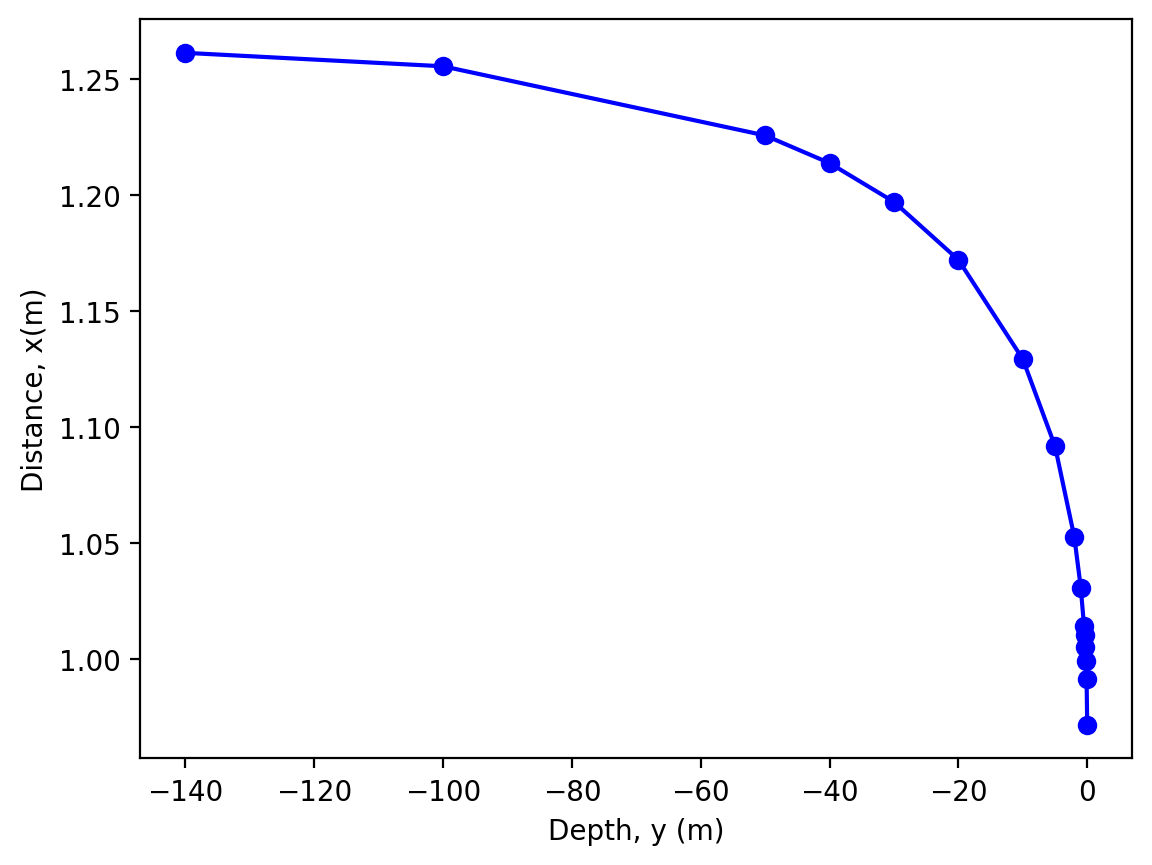

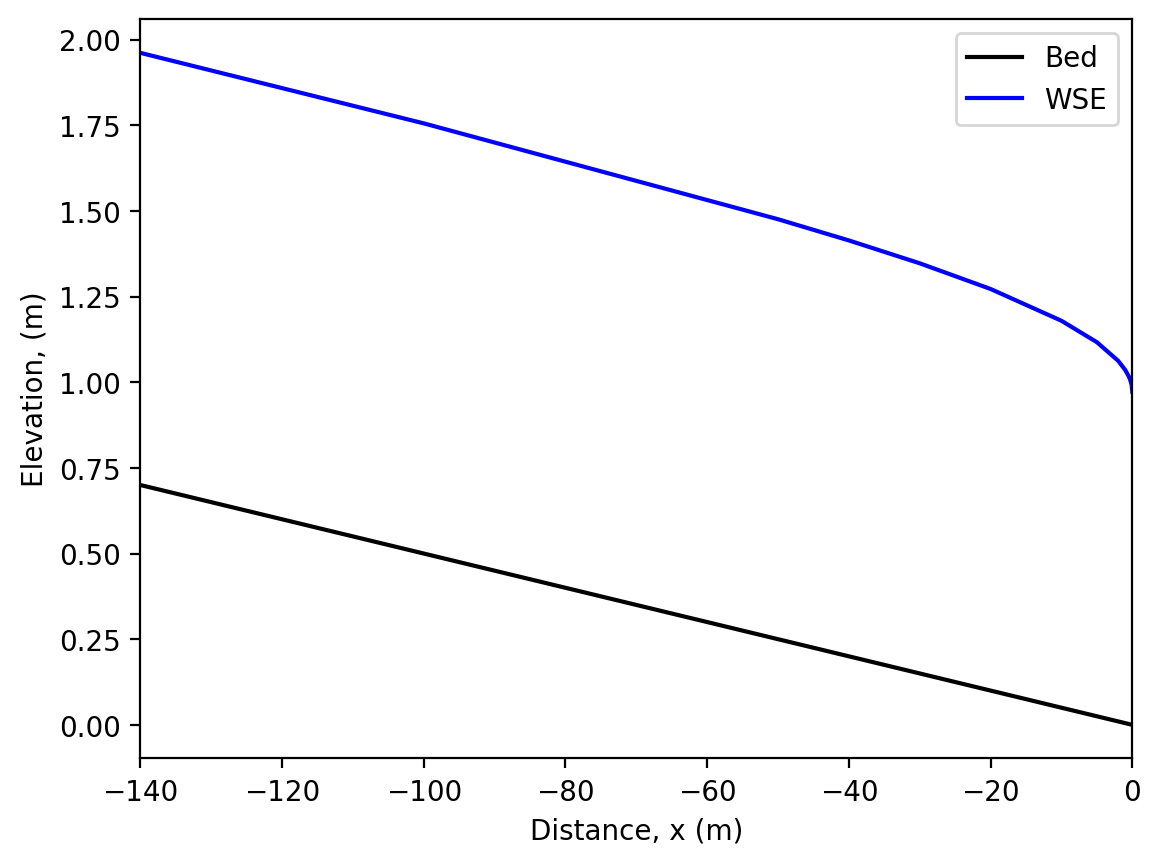

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, newton

#=============================#
#           Inputs            #
#=============================#
Q = 30
So = 0.005
n = 0.030
b = 10
m = 0 #input 0 if rectangular

g = 9.81
if g > 10:
    k = 1.486
else:
    k = 1
#=============================#
#                             #
#=============================#

################
# Normal Depth #
################
def manning(y, Q, b, S_o, n, k, m):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        R = b*y / (b + 2*y)
    else:
        R = A / (b + 2*m*y * (1 + m**2)**(1/2))
    return Q - (k/n) * A * R**(2/3) * S_o**(1/2)
y_o = fsolve(manning, 1, args=(Q, b, S_o, n, k, m))

##################
# Critical Depth #
##################
def crit(y):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        T = b
    else:
        T = b + 2*m*y
    return Q/np.sqrt(g*A**3/T) - 1
y_c = newton(crit, 0.2)
#Down Stream Boundary condition
yd= y_c

##########################
# Profile initialization #
##########################

xup = -200

N= 16
x = np.array([0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -1.0, -2.0, -5.0, -10.0, -20.0, -30.0, -40.0, -50.0, -100.0, -140.0])
y = np.zeros(N)
y[0]=yd

##########
# Energy #
##########
def dE(y2, x1, x2, y1):
    if m==0:
        A1 = b * y1
    else:
        A1 = (b + m*y1) * y1
    if m==0:
        R1 = b*y1 / (b + 2*y1)
    else:
        R1 = A1 / (b + 2*m*y1 * (1 + m**2)**(1/2))
    Sf1 = (Q*n / (k * A1 * R1**(2/3)))**2
    E1 = y1 + Q**2 / (2 * g * A1**2)
    
    if m==0:
        A2 = b * y2
    else:
        A2 = (b + m*y2) * y2
    if m==0:
        R2 = b*y2 / (b + 2*y2)
    else:
        R2 = A2 / (b + 2*m*y2 * (1 + m**2)**(1/2))
    Sf2 = (Q*n / (k * A2 * R2**(2/3)))**2
    E2 = y2 + Q**2 / (2 * g * A2**2)
    
    Sfavg=(Sf1 + Sf2)/2
    return(E2 - E1) / (So - Sfavg) - (x2 -x1)

######################
# Profile Generation #
######################
for i in range(1, N):
    y[i]= fsolve(dE, y[i-1], args=(x[i-1], x[i], y[i-1]))

################
# Profile Plot #
################
eta = -x *So
WSE = eta + y

print('Distance to the upstream boundary condition (m)=', np.around(x[N-1], decimals=2))

plt.plot(x,y, linestyle='-', marker='o', color='b')
plt.xlabel('Depth, y (m)')
plt.ylabel('Distance, x(m)')
plt.show()

plt.plot(x,eta, '-k', label='Bed')
plt.plot(x,WSE, linestyle='-', color='b', label='WSE')
plt.legend()
plt.ylabel('Elevation, (m)')
plt.xlabel('Distance, x (m)')
plt.xlim(x[N-1], x[0])
plt.show()

## 2b. Describe the differences in approach and effort behind the standard step method when using y to determine x (as done in Example 6.1) and the standard step method when using x to determine y (as done in this example).

---

# Problem 3

Problem 6.2 of Moglen (2015). Do not do part “e”. Use either the Direct
Step methods (pick the one you like best), but don’t worry about working the
problem a second way; that is, skip part “d”.

A 2 m wide rectangular reach with slope, S0 = 0.005 m/m, carries 
a discharge, Q = 5 m3/s, and has a Manning’s n = 0.055. A sluice 
gate imposes an upstream flow depth of 0.10 m. At the downstream 
end of the channel critical flow conditions prevail. Assume a large 
overall reach length of 100 m.

    a. Determine normal depth and whether flow at normal conditions is supercritical or subcritical.
    
    b.  What profile(s) do you expect in this reach? Draw a sketch of the profiles anticipated within the reach.
    
    c. Use the standard step method (x calculated from y) to quantitatively calculate all flow profiles and to determine the location of all jumps.
 

## 3a. Determine normal depth and whether flow at normal conditions is supercritical or subcritical.

In [442]:
b= 2
So= 0.005
Q= 5
n= 0.055
length= 100
k=1
y_gate = 0.1

def manning(y, Q, b, S_o, n, k):
    A = b * y
    R = b*y / (b + 2*y)
    return Q - (k/n) * A * R**(2/3) * S_o**(1/2)
y_o = fsolve(manning, 1, args=(Q, b, So, n, k))
print("Normal Depth (m)=", around(y_o[0], decimals=2))

Fr_o = (Q / (b * y_o[0])) / (g * y_o[0])**0.5

if Fr_o > 1:
    print("Flow at Normal Conditions is Super-critical: Fr=", around(Fr_o, decimals=2))
if Fr_o < 1:
    print("Flow at Normal Conditions is Sub-critical: Fr=", around(Fr_o, decimals=2))
if Fr_o ==1:
    print("Flow at Normal Conditions is critical: Fr =", around(Fr_o, decimals=2))

Normal Depth (m)= 2.44
Flow at Normal Conditions is Sub-critical: Fr= 0.21


## 3b. What profile(s) do you expect in this reach? Draw a sketch of the profiles anticipated within the reach.

In [507]:
b= 2
So= 0.005
Q= 5
n= 0.055
length= 1000
k=1
y_gate = 0.1
g = 9.81

q = Q / (b * y_o)
E = y_o + q**2 / (2 * g * y_o**2)

def rec_crit(y, b, Q, g):
    A = b * y
    T = b
    Fr_c = Q / (g * A**3 / T)**0.5
    return(Fr_c - 1)
cguess = 0.1
y_c = fsolve(rec_crit, cguess, args=(b, Q, g))

E_o = y_o + (q**2 / (2 * g * y_o**2))
E_gate = y_gate + (q**2 / (2 * g * y_gate**2))
y_up = (2 * y_gate) / (-1 + (1 + 8 * g * y_gate**3 / q**2)**0.5)
Fr_o = (Q / (b * y_o)) / (g * y_o)**0.5
y_s = y_o * 0.5 * (-1 + (1 + 8 * Fr_o**2)**0.5)

def alt_rec(f, y, b, Q, g):
    A = b * y
    T = b
    Fr = Q / (g * A**3 / T)**0.5
    return (((2 * y) / (-1 + (1 + (8 * g * y**3) / (q**2))**0.5)) - f)

fguess = 4
y_up = fsolve(alt_rec, fguess, args=(y_gate, b, Q, g))

data = [
    ["Normal Depth", np.round(y_o[0], 2)],
    ["Critical Depth", np.round(y_c, 2)],
    ["Depth Directly Upstream at Gate", np.round(y_up[0], 2)],
    ["Depth at Gate", y_gate],
    ["Sequent Depth DownStream",np.round(y_s[0], 2)],
]

headers = ["Variable", "Depth (m)"]
print(tabulate(data, headers=headers, tablefmt="grid"))

+---------------------------------+-------------+
| Variable                        |   Depth (m) |
+=================================+=============+
| Normal Depth                    |        2.44 |
+---------------------------------+-------------+
| Critical Depth                  |        0.86 |
+---------------------------------+-------------+
| Depth Directly Upstream at Gate |        5.43 |
+---------------------------------+-------------+
| Depth at Gate                   |        0.1  |
+---------------------------------+-------------+
| Sequent Depth DownStream        |        0.2  |
+---------------------------------+-------------+


## 3c. Use the standard step method (x calculated from y) to quantitatively calculate all flow profiles and to determine the location of all jumps.

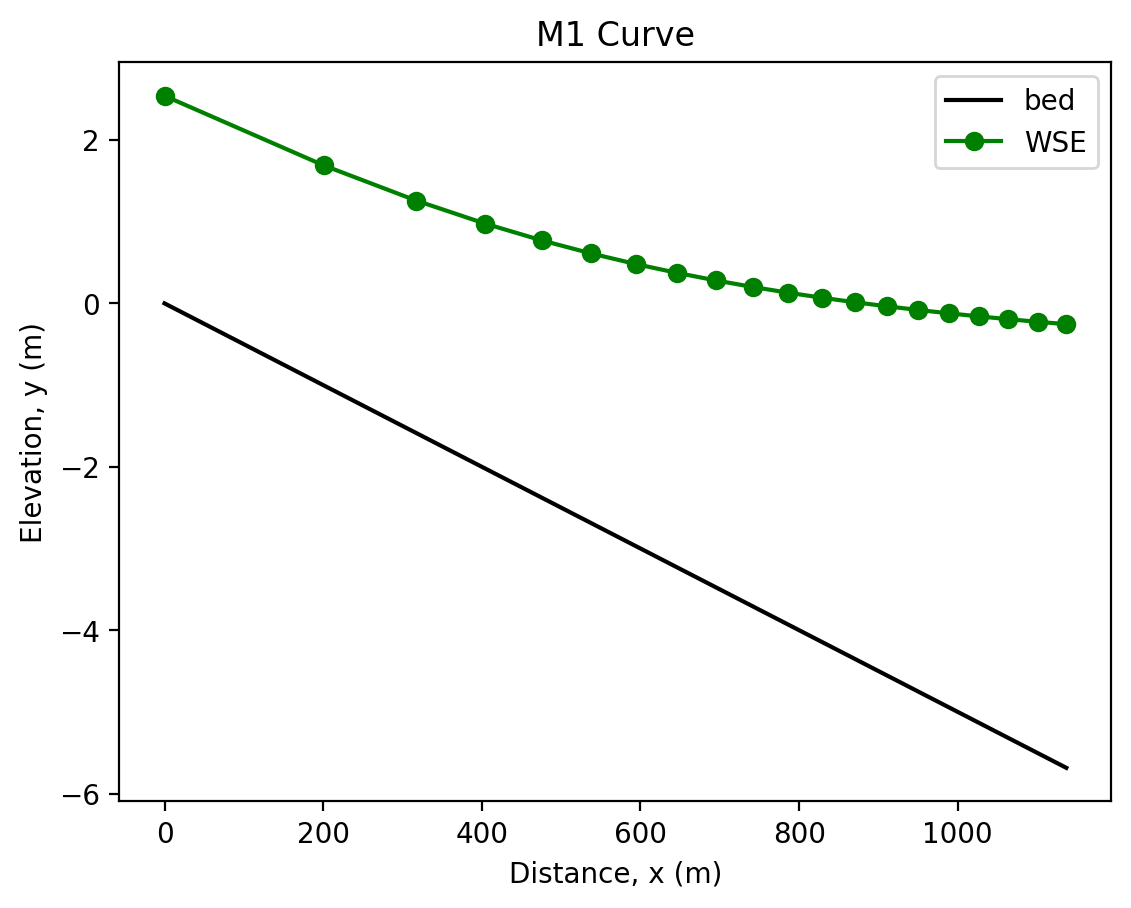

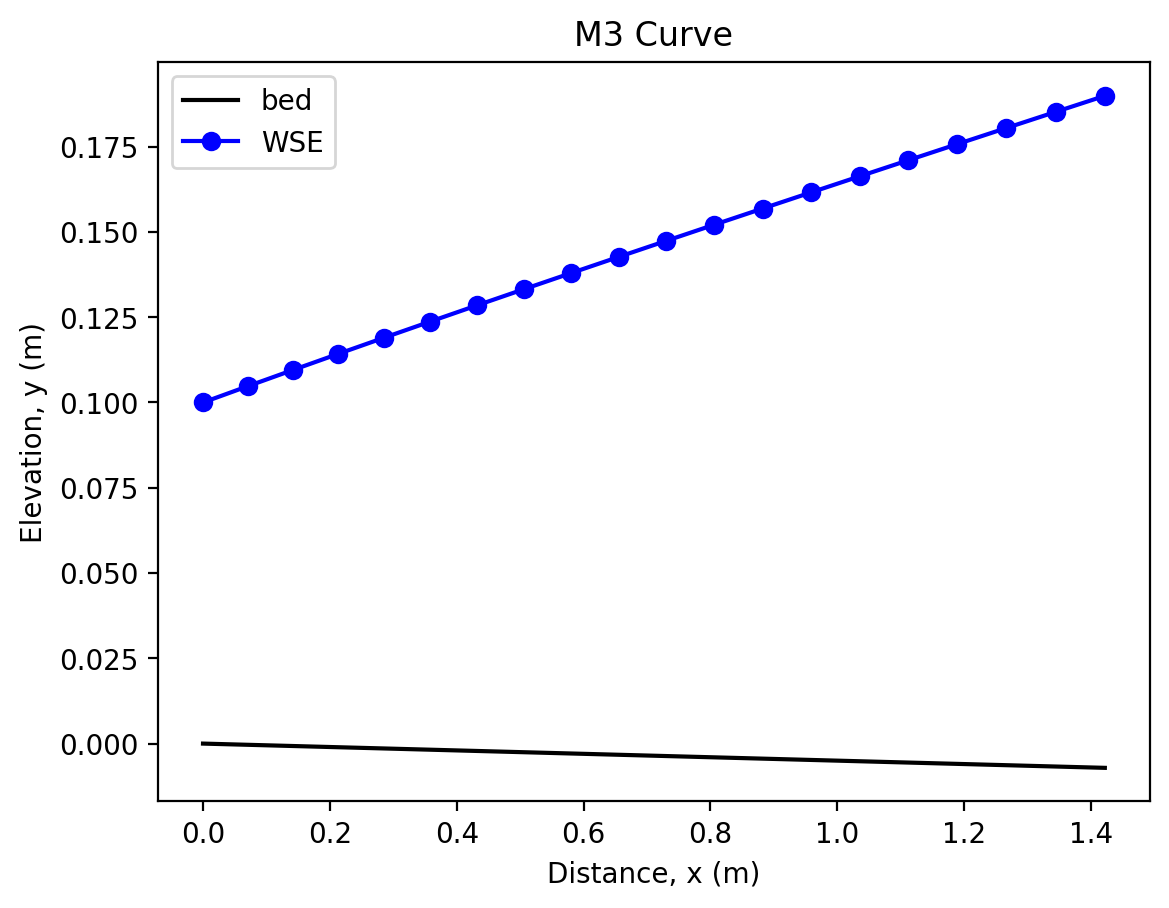

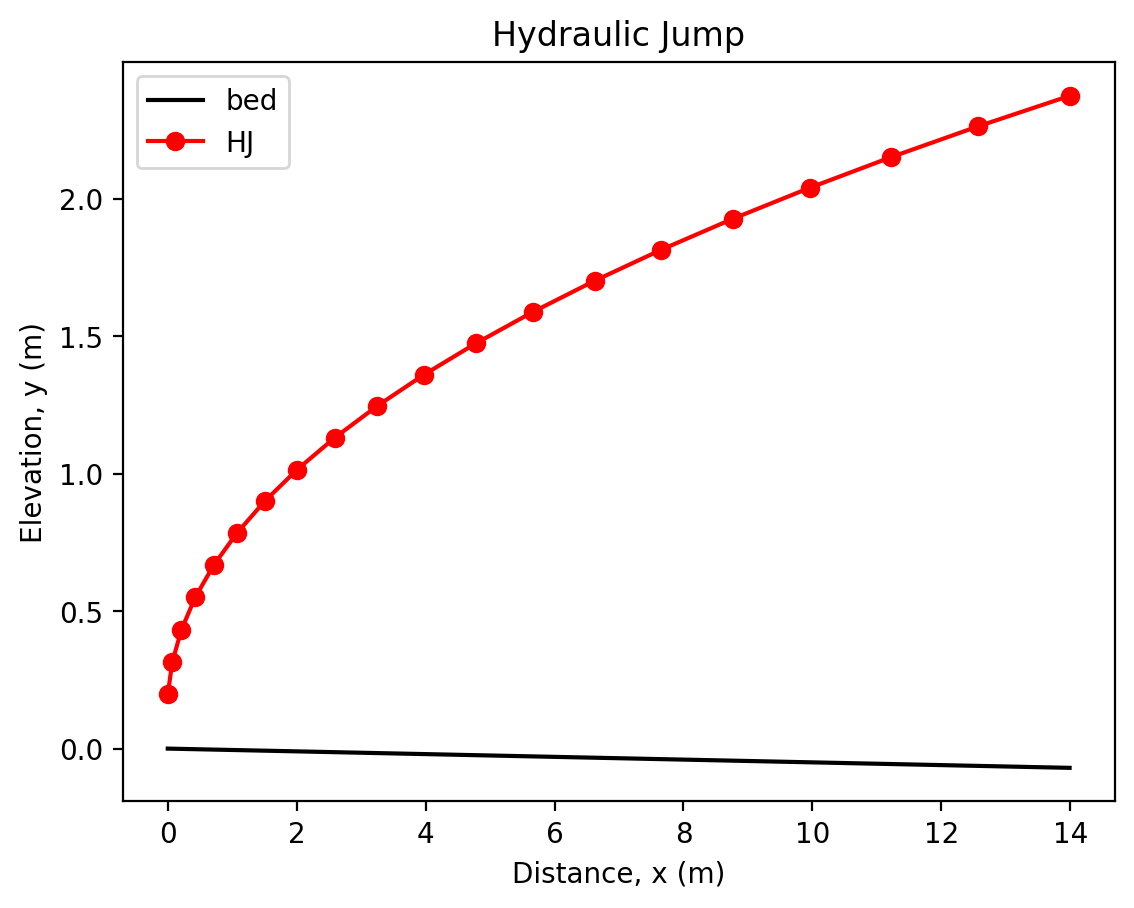

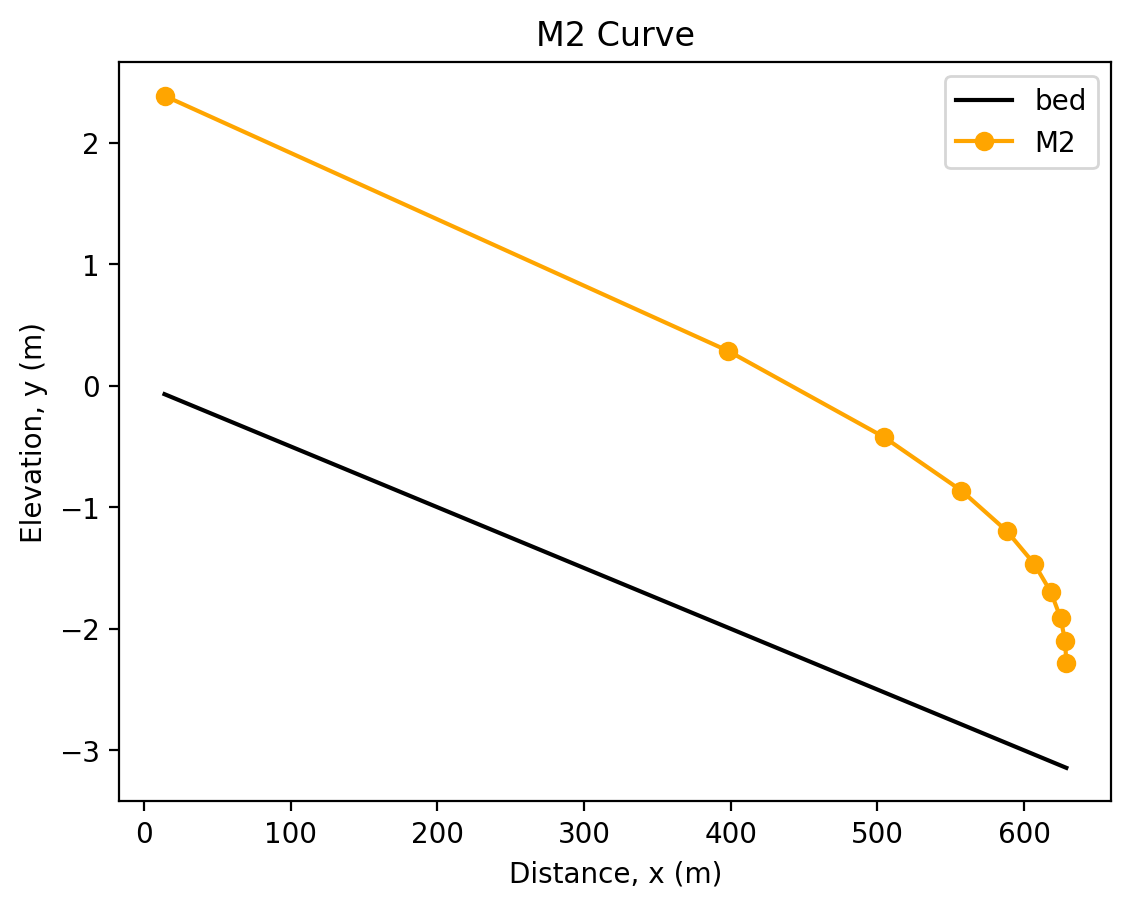

In [515]:
##############
# M1 Profile #
##############

#######################
# Boundary Conditions #
#######################
y_up0 = np.round(y_o[0], 2) + 0.1
y_dwn0 = 5.43

######################
# Profile Generation #
######################
N0 = 20
y0 = np.linspace(y_up0, y_dwn0, N0)

dx0 = np.zeros(N0-1)
x0 = np.zeros(N0)

#Defining area as rec or trap
if m==0:
    A0 = b * y0
else:
    A0 = (b + m*y0) * y0

#Defining R as rec or trap
if m==0:
    R0 = b*y0 / (b + 2*y0)
else:
    R0 = A0 / (b + 2*m*y0 * (1 + m**2)**(1/2))

S_f0 = (Q*n / (k * A0 * R0**(2/3)))**2
E0 = y0 + Q**2 / (2 * g * A0**2)
dx0 = (E0[1:] - E0[:-1]) / (S_o - 0.5 * (S_f0[1:] + S_f0[:-1])) #populate dx
x_o0 = 0 #starting point
x0[0] = 0 #initialize
x0[1:] = dx0
x0 = np.cumsum(x0)

########
# Plot #
########
eta0 = -x0 * S_o
WSE0 = eta0 + y0

plt.plot(x0,eta0, 'k-', label='bed')
plt.plot(x0,WSE0, linestyle='-', marker='o', color='g', label='WSE')
plt.legend()
plt.title('M1 Curve')
plt.ylabel('Elevation, y (m)')
plt.xlabel('Distance, x (m)')
plt.show()

##############
# M3 Profile #
##############

#######################
# Boundary Conditions #
#######################
y_up = y_gate
y_dwn = np.round(y_s[0], 3)

######################
# Profile Generation #
######################
N = 20
y = np.linspace(y_up, y_dwn, N)

dx = np.zeros(N-1)
x = np.zeros(N)

#Defining area as rec or trap
if m==0:
    A = b * y
else:
    A = (b + m*y) * y

#Defining R as rec or trap
if m==0:
    R = b*y / (b + 2*y)
else:
    R = A / (b + 2*m*y * (1 + m**2)**(1/2))

S_f = (Q*n / (k * A * R**(2/3)))**2
E = y + Q**2 / (2 * g * A**2)
dx = (E[1:] - E[:-1]) / (S_o - 0.5 * (S_f[1:] + S_f[:-1])) #populate dx
x_o = 0 #starting point
x[0] = 0 #initialize
x[1:] = dx
x = np.cumsum(x)

########
# Plot #
########
eta = -x * S_o
WSE = eta + y

plt.plot(x,eta, 'k-', label='bed')
plt.plot(x,WSE, linestyle='-', marker='o', color='b', label='WSE')
plt.legend()
plt.title('M3 Curve')
plt.ylabel('Elevation, y (m)')
plt.xlabel('Distance, x (m)')
plt.show()
##############
# HJ Profile #
##############

#######################
# Boundary Conditions #
#######################
y_up2 = np.round(y_s[0], 3)
y_dwn2 = np.round(y_o[0], 3)

######################
# Profile Generation #
######################
N2 = 20
y2 = np.linspace(y_up2, y_dwn2, N2)

dx2 = np.zeros(N2-1)
x2 = np.zeros(N2)

#Defining area as rec or trap
if m==0:
    A2 = b * y2
else:
    A2 = (b + m*y2) * y2

#Defining R as rec or trap
if m==0:
    R2 = b*y2 / (b + 2*y2)
else:
    R2 = A2 / (b + 2*m*y2 * (1 + m**2)**(1/2))

S_f2 = (Q*n / (k * A2 * R2**(2/3)))**2
E2 = y2 + Q**2 / (2 * g * A2**2)
dx2 = (E2[1:] - E2[:-1]) / (S_o - 0.5 * (S_f2[1:] + S_f2[:-1])) #populate dx
x_o2 = 1.42187422 #starting point
x2[0] = x_o2 #initialize
x2[1:] = dx2
x2 = np.cumsum(x)

########
# Plot #
########
eta2 = -x2 * S_o
WSE2 = eta2 + y2

plt.plot(x2,eta2, 'k-', label='bed')
plt.plot(x2,WSE2, linestyle='-', marker='o', color='r', label='HJ')
plt.legend()
plt.title("Hydraulic Jump")
plt.ylabel('Elevation, y (m)')
plt.xlabel('Distance, x (m)')
plt.show()


##############
# M2 Profile #
##############

#######################
# Boundary Conditions #
#######################
y_up3 = np.round(y_o[0], 3) + 0.01
y_dwn3 = np.round(y_c[0], 3)

######################
# Profile Generation #
######################
N3 = 10
y3 = np.linspace(y_up3, y_dwn3, N3)

dx3 = np.zeros(N3-1)
x3 = np.zeros(N3)

#Defining area as rec or trap
if m==0:
    A3 = b * y3
else:
    A3 = (b + m*y3) * y3

#Defining R as rec or trap
if m==0:
    R3 = b*y3 / (b + 2*y3)
else:
    R3 = A3 / (b + 2*m*y3 * (1 + m**2)**(1/2))

S_f3 = (Q*n / (k * A3 * R3**(2/3)))**2
E3 = y3 + Q**2 / (2 * g * A3**2)
dx3 = (E3[1:] - E3[:-1]) / (S_o - 0.5 * (S_f3[1:] + S_f3[:-1])) #populate dx
x_o3 = 14 #starting point
x3[0] = x_o3 #initialize
x3[1:] = dx3
x3 = np.cumsum(x3)

########
# Plot #
########
eta3 = -x3 * S_o
WSE3 = eta3 + y3

plt.plot(x3,eta3, 'k-', label='bed')
plt.plot(x3,WSE3, linestyle='-', marker='o', color='orange', label='M2')
plt.legend()
plt.title('M2 Curve')
plt.ylabel('Elevation, y (m)')
plt.xlabel('Distance, x (m)')
plt.show()




---

# Problem 4

Consider a river reach with a slope of 0.0005 entering a lake or reservoir (see
figure below). Given a discharge of Q = 30 cms, a bottom width of b = 10 m,
and Manning n value of n = 0.03, calculate and plot the water surface profile
under the following conditions:

    a. Low water level (lake elevation = 651 m)
    
    b. High water level (lake elevation = 659 m)
    
The invert elevation at the end of the channel is equal to 650 m. How far
upstream of the lake is the influence of the boundary felt in each case? What
is the maximum change in velocity compared to the normal flow condition
in each case?

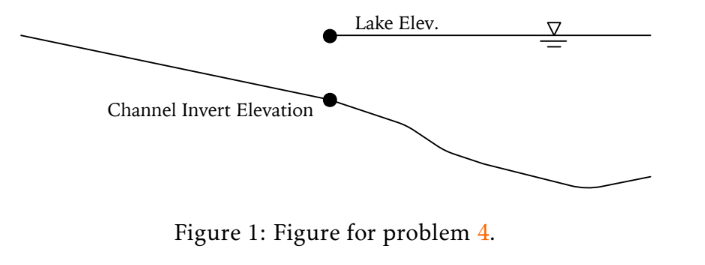

## 4a. Low water level (lake elevation = 651 m)

+-----------------------------+----------+------------------------------+
| Variable                    | Value    |   WSE (With Elevation Datum) |
+=============================+==========+==============================+
| Normal Depth                | 2.75     |                       652.75 |
+-----------------------------+----------+------------------------------+
| Critical Depth              | 0.97     |                       650.97 |
+-----------------------------+----------+------------------------------+
| Depth at Lake               | 1        |                       651    |
+-----------------------------+----------+------------------------------+
| Reach Class (M2 Curve)      | Mild     |                              |
+-----------------------------+----------+------------------------------+
| Dist. of Influence Upstream | 11171.12 |                              |
+-----------------------------+----------+------------------------------+
| Maximum Change in Velocity  | 2.64  

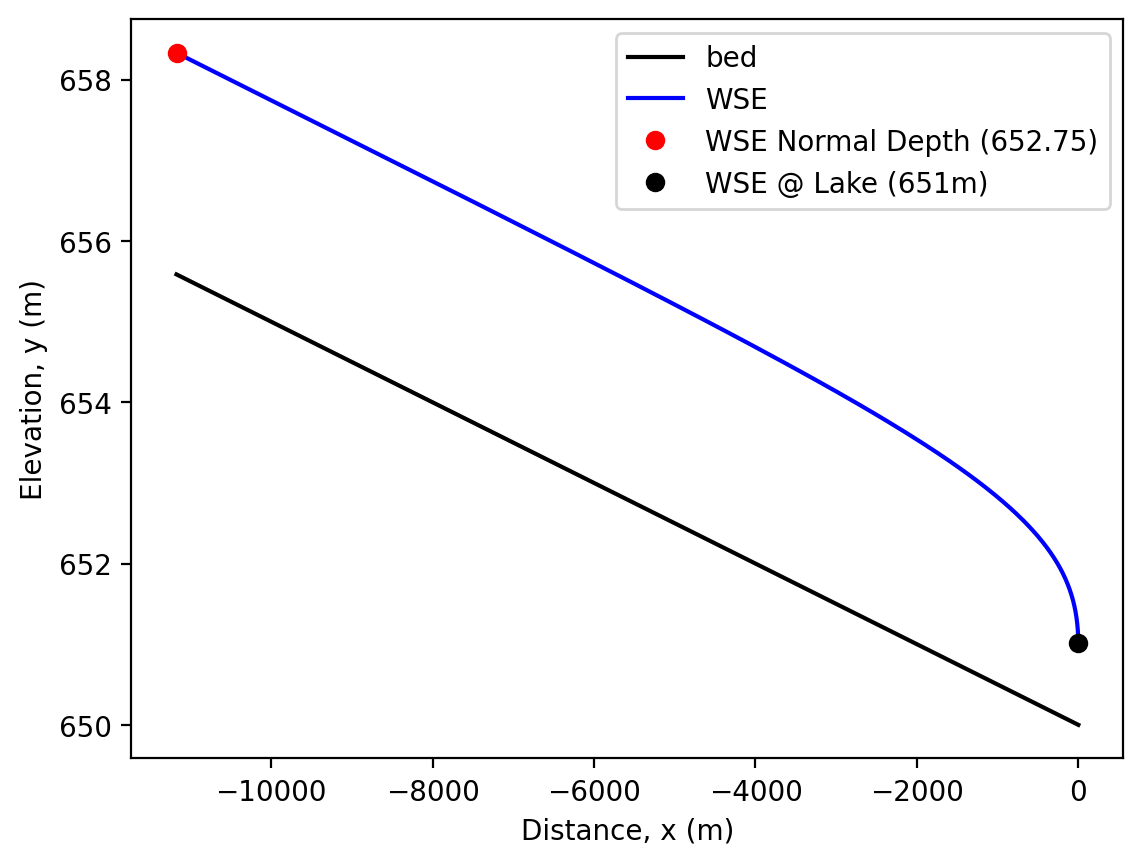

In [523]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, newton
from tabulate import tabulate

#=============================#
#           Inputs            #
#=============================#
Q = 30
S_o = 0.0005
n = 0.030
b = 10
m = 0 #input 0 if rectangular

elev_datum = 650
lake = 651 - elev_datum

g = 9.81
if g > 10:
    k = 1.486
else:
    k = 1
#=============================#
#                             #
#=============================#

################
# Normal Depth #
################
def manning(y, Q, b, S_o, n, k, m):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        R = b*y / (b + 2*y)
    else:
        R = A / (b + 2*m*y * (1 + m**2)**(1/2))
    return Q - (k/n) * A * R**(2/3) * S_o**(1/2)

y_o = fsolve(manning, 1, args=(Q, b, S_o, n, k, m))

##################
# Critical Depth #
##################
def crit(y):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        T = b
    else:
        T = b + 2*m*y
    return Q/np.sqrt(g*A**3/T) - 1
y_c = newton(crit, 0.2)

########################
# Reach Classification #
########################
if y_o > y_c:
    reach_class = "Mild"
if y_o < y_c:
    reach_class = "Steep"
if y_o == y_c:
    reach_class = "Critical"

#######################
# Boundary Conditions #
#######################
y_up = np.round(y_o[0], 4)
y_dwn = lake + 0.0001

######################
# Profile Generation #
######################
N = 200
y = np.linspace(y_dwn, y_up, N)

dx = np.zeros(N-1)
x = np.zeros(N)

#Defining area as rec or trap
if m==0:
    A = b * y
else:
    A = (b + m*y) * y

#Defining R as rec or trap
if m==0:
    R = b*y / (b + 2*y)
else:
    R = A / (b + 2*m*y * (1 + m**2)**(1/2))

S_f = (Q*n / (k * A * R**(2/3)))**2
E = y + Q**2 / (2 * g * A**2)

dx = (E[1:] - E[:-1]) / (S_o - 0.5 * (S_f[1:] + S_f[:-1])) #populate dx
x_o = 0 #starting point
x[0] = 0 #initialize
x[1:] = dx
x = np.cumsum(x)


v = Q / ((-x * S_o + y) * b)
vmin = min(v)
vmax = max(v)
vchange = vmax - vmin

##############
# Data Table #
##############
data = [
    ["Normal Depth", np.round(y_o[0], 2), np.round(y_o[0]+elev_datum, 2)],
    ["Critical Depth", np.round(y_c, 2), np.round(y_c+elev_datum, 2)],
    ["Depth at Lake", lake, lake + elev_datum],
    ["Reach Class (M2 Curve)", reach_class],
    ["Dist. of Influence Upstream", np.around(-1 * x[-1], decimals=2)],
    ["Maximum Change in Velocity", np.round(vchange, 2)],
    ["Velocity at Normal", np.round(vmin, 2)],
    ["Velocity at Lake", np.round(vmax, 2)],
]

headers = ["Variable", "Value", "WSE (With Elevation Datum)"]
print(tabulate(data, headers=headers, tablefmt="grid"))

############
# Graphing #
############
eta = -x * S_o + elev_datum
WSE = eta + y

plt.plot(x,eta, 'k-', label='bed')
plt.plot(x,WSE, linestyle='-', color='b', label='WSE')
plt.plot(x[N-1], WSE[N-1], marker='o', color = 'r', label='WSE Normal Depth (652.75)', linestyle='')
plt.plot(x[1], WSE[1], marker='o', color = 'black', label='WSE @ Lake (651m)', linestyle='')
plt.legend()
plt.ylabel('Elevation, y (m)')
plt.xlabel('Distance, x (m)')
plt.show()


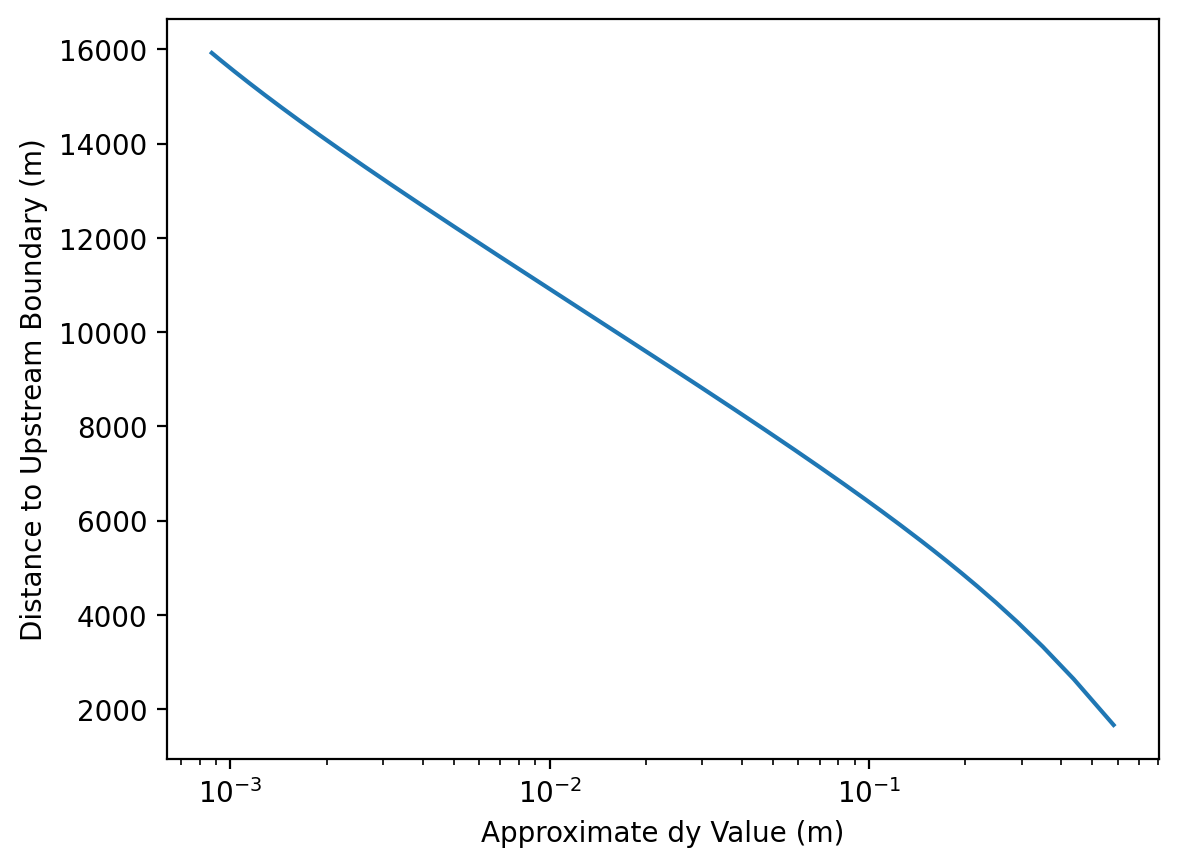

In [521]:
Nmin = 3
Nmax = 2000

dist = np.zeros(Nmax - Nmin + 1)
ynum = np.arange(Nmin, Nmax + 1)
dxx = np.zeros(Nmax - Nmin + 1)

if g>10:
    k = 1.486
else:
    k = 1

for i in range(Nmin,Nmax +1):
    N = i
    y = linspace(y_dwn, y_up, N)
    dx = np.zeros(N-1)
    x = np.zeros(N)
    
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y 
    if m==0:
        R = b*y / (b + 2*y)
    else:
        R = A / (b + 2*m*y * (1 + m**2)**(1/2))
    S_f = (Q*n / (k * A * R**(2/3)))**2
    E = y + Q**2 / (2 * g * A**2)
    
    dx = (E[1:] - E[:-1]) / (S_o - 0.5 * (S_f[1:] + S_f[:-1])) #populate dx
    x_o = 0 #starting point
    x[0] = 0 #initialize
    x[1:] = dx
    x = np.cumsum(x)
    
    ynum[i-Nmin]=i
    dist[i-Nmin]=x[N-1]
    
yres=abs(y_up - y_dwn)/ynum
plt.plot(yres, abs(dist))
plt.xlabel('Approximate dy Value (m)')
plt.ylabel('Distance to Upstream Boundary (m)')
plt.xscale('log')

## 4b. High water level (lake elevation = 659 m)

+-----------------------------+----------+------------------------------+
| Variable                    | Value    |   WSE (With Elevation Datum) |
+=============================+==========+==============================+
| Normal Depth                | 2.75     |                       652.75 |
+-----------------------------+----------+------------------------------+
| Critical Depth              | 0.97     |                       650.97 |
+-----------------------------+----------+------------------------------+
| Depth at Lake               | 9        |                       659    |
+-----------------------------+----------+------------------------------+
| Reach Class (M1 Curve)      | Mild     |                              |
+-----------------------------+----------+------------------------------+
| Dist. of Influence Upstream | 23766.03 |                              |
+-----------------------------+----------+------------------------------+
| Maximum Change in Velocity  | 0.13  

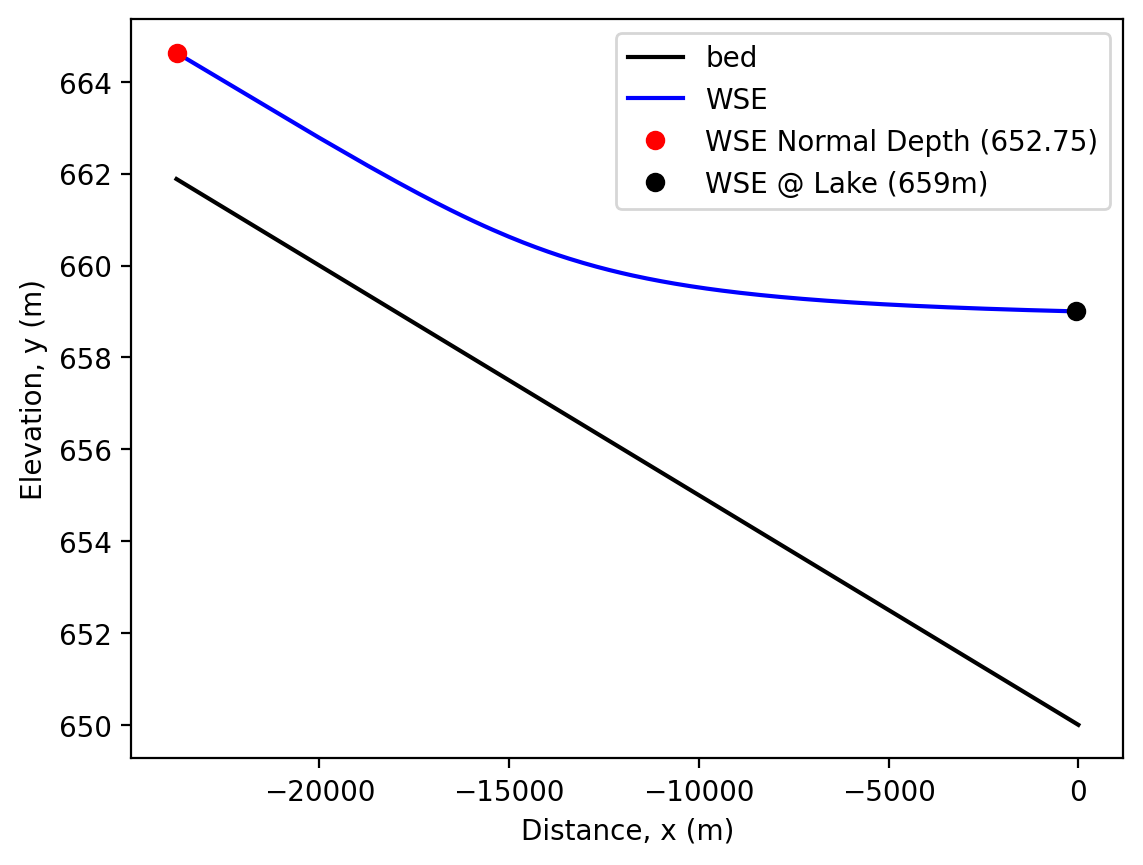

In [542]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, newton
from tabulate import tabulate

#=============================#
#           Inputs            #
#=============================#
Q = 30
S_o = 0.0005
n = 0.030
b = 10
m = 0 #input 0 if rectangular

elev_datum = 650
lake = 659 - elev_datum

g = 9.81
if g > 10:
    k = 1.486
else:
    k = 1
#=============================#
#                             #
#=============================#

################
# Normal Depth #
################
def manning(y, Q, b, S_o, n, k, m):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        R = b*y / (b + 2*y)
    else:
        R = A / (b + 2*m*y * (1 + m**2)**(1/2))
    return Q - (k/n) * A * R**(2/3) * S_o**(1/2)

y_o = fsolve(manning, 1, args=(Q, b, S_o, n, k, m))

##################
# Critical Depth #
##################
def crit(y):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        T = b
    else:
        T = b + 2*m*y
    return Q/np.sqrt(g*A**3/T) - 1
y_c = newton(crit, 0.2)

########################
# Reach Classification #
########################
if y_o > y_c:
    reach_class = "Mild"
if y_o < y_c:
    reach_class = "Steep"
if y_o == y_c:
    reach_class = "Critical"

#######################
# Boundary Conditions #
#######################
y_up = y_o[0]
y_dwn = lake

######################
# Profile Generation #
######################
N = 200
y = np.linspace(y_dwn, y_up, N)

dx = np.zeros(N-1)
x = np.zeros(N)

#Defining area as rec or trap
if m==0:
    A = b * y
else:
    A = (b + m*y) * y

#Defining R as rec or trap
if m==0:
    R = b*y / (b + 2*y)
else:
    R = A / (b + 2*m*y * (1 + m**2)**(1/2))

S_f = (Q*n / (k * A * R**(2/3)))**2
E = y + Q**2 / (2 * g * A**2)

dx = (E[1:] - E[:-1]) / (S_o - 0.5 * (S_f[1:] + S_f[:-1])) #populate dx
x_o = 0 #starting point
x[0] = 0 #initialize
x[1:] = dx
x = np.cumsum(x)


v = Q / ((-x * S_o + y) * b)
vmin = min(v)
vmax = max(v)
vchange = vmax - vmin

##############
# Data Table #
##############
data = [
    ["Normal Depth", np.round(y_o[0], 2), np.round(y_o[0]+elev_datum, 2)],
    ["Critical Depth", np.round(y_c, 2), np.round(y_c+elev_datum, 2)],
    ["Depth at Lake", lake, lake + elev_datum],
    ["Reach Class (M1 Curve)", reach_class],
    ["Dist. of Influence Upstream", np.around(-1 * x[-1], decimals=2)],
    ["Maximum Change in Velocity", np.round(vchange, 2)],
    ["Velocity at Normal", np.round(vmin, 2)],
    ["Velocity at Lake", np.round(vmax, 2)],
]

headers = ["Variable", "Value", "WSE (With Elevation Datum)"]
print(tabulate(data, headers=headers, tablefmt="grid"))

############
# Graphing #
############
eta = -x * S_o + elev_datum
WSE = eta + y

plt.plot(x,eta, 'k-', label='bed')
plt.plot(x,WSE, linestyle='-', color='b', label='WSE')
plt.plot(x[N-1], WSE[N-1], marker='o', color = 'r', label='WSE Normal Depth (652.75)', linestyle='')
plt.plot(x[1], WSE[1], marker='o', color = 'black', label='WSE @ Lake (659m)', linestyle='')
plt.legend()
plt.ylabel('Elevation, y (m)')
plt.xlabel('Distance, x (m)')
plt.show()


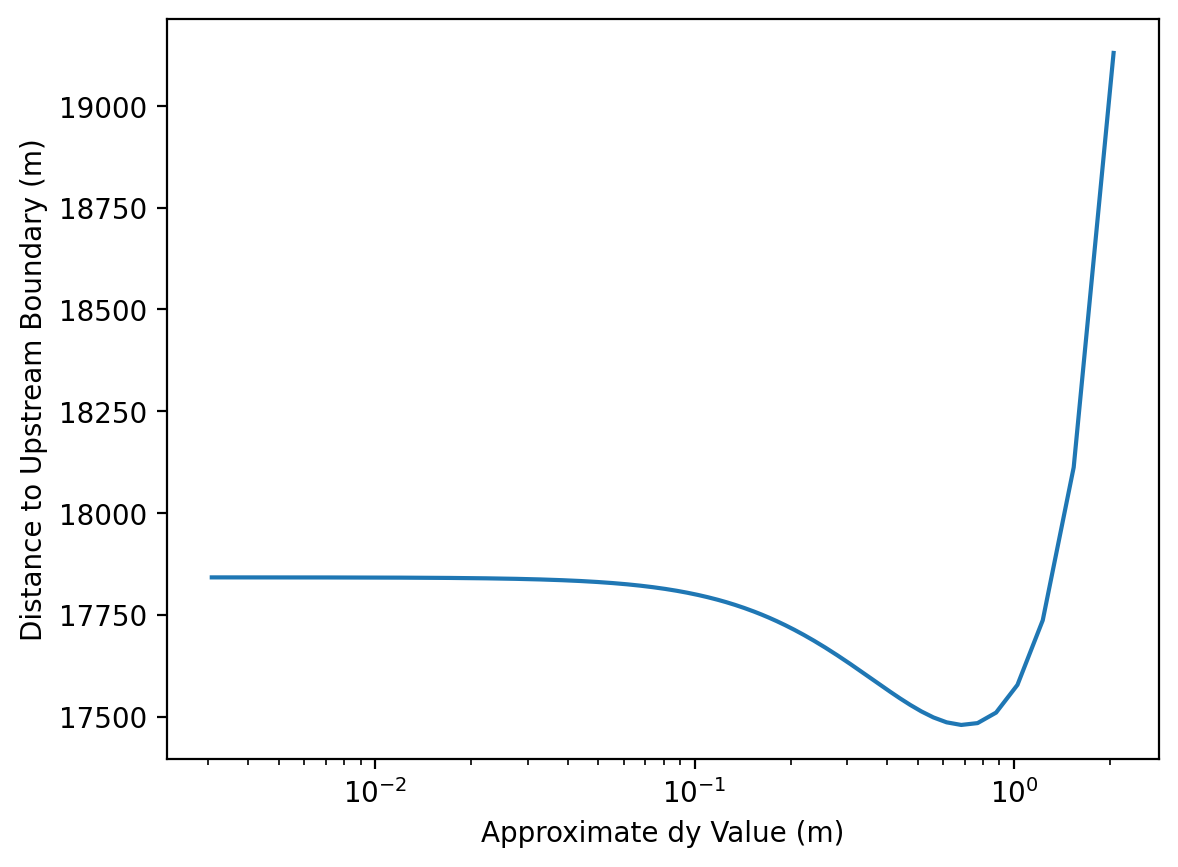

In [525]:
Nmin = 3
Nmax = 2000

dist = np.zeros(Nmax - Nmin + 1)
ynum = np.arange(Nmin, Nmax + 1)
dxx = np.zeros(Nmax - Nmin + 1)

if g>10:
    k = 1.486
else:
    k = 1

for i in range(Nmin,Nmax +1):
    N = i
    y = linspace(y_dwn, y_up, N)
    dx = np.zeros(N-1)
    x = np.zeros(N)
    
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y 
    if m==0:
        R = b*y / (b + 2*y)
    else:
        R = A / (b + 2*m*y * (1 + m**2)**(1/2))
    S_f = (Q*n / (k * A * R**(2/3)))**2
    E = y + Q**2 / (2 * g * A**2)
    
    dx = (E[1:] - E[:-1]) / (S_o - 0.5 * (S_f[1:] + S_f[:-1])) #populate dx
    x_o = 0 #starting point
    x[0] = 0 #initialize
    x[1:] = dx
    x = np.cumsum(x)
    
    ynum[i-Nmin]=i
    dist[i-Nmin]=x[N-1]
    
yres=abs(y_up - y_dwn)/ynum
plt.plot(yres, abs(dist))
plt.xlabel('Approximate dy Value (m)')
plt.ylabel('Distance to Upstream Boundary (m)')
plt.xscale('log')

---

# Problem 5

Consider two reservoirs connected by two reaches in series. The first reach
has a slope of 0.005 and is 500 m long. The second has a slope of 0.02 and is
200 m long. Both channels have a bottom width of b = 10 m and a Manning
n value of n = 0.03. The elevation of the upstream lake is 3.5 m above the
invert of the inlet channel. Compute and plot the water surface profile if the
downstream lake is 5 m above the invert of the outlet channel. Do not worry
about computing the profile between the top end of reach 1 and the water
surface elevation of the lake.


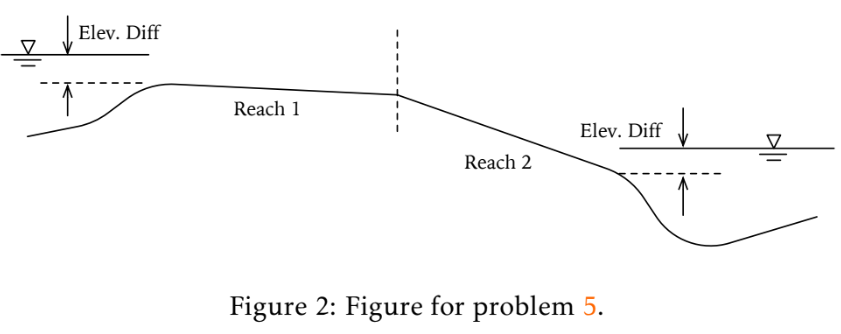


### Reach 1

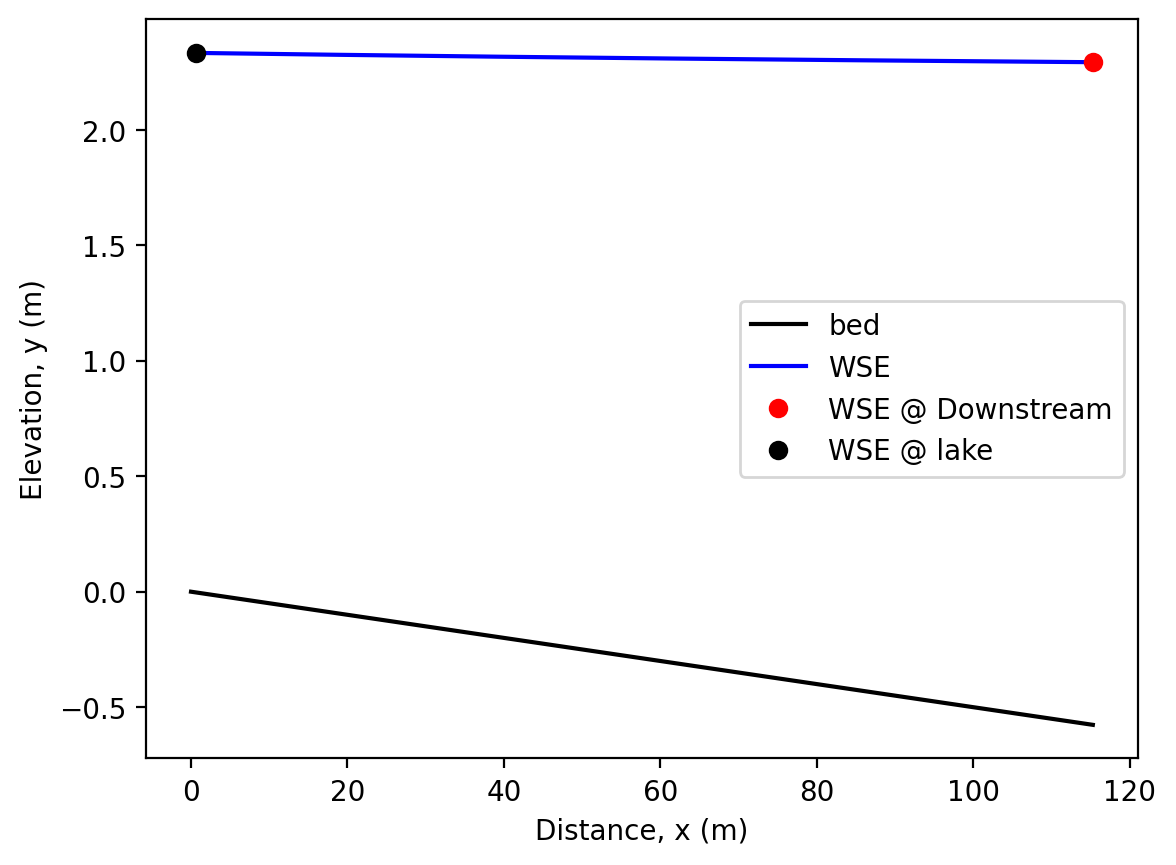

Critical Depth= 2.333333333333333
Normal Depth = [2.86935859]
Discharge= [100.93123105]
[100.93123105]
Distance to bc = -698.0


C:\Users\tylersmith22\AppData\Local\Temp\ipykernel_10404\1320403807.py:94: RuntimeWarning: invalid value encountered in power
  Sf2 = (Q1*n / (k * A2 * R2**(2/3)))**2


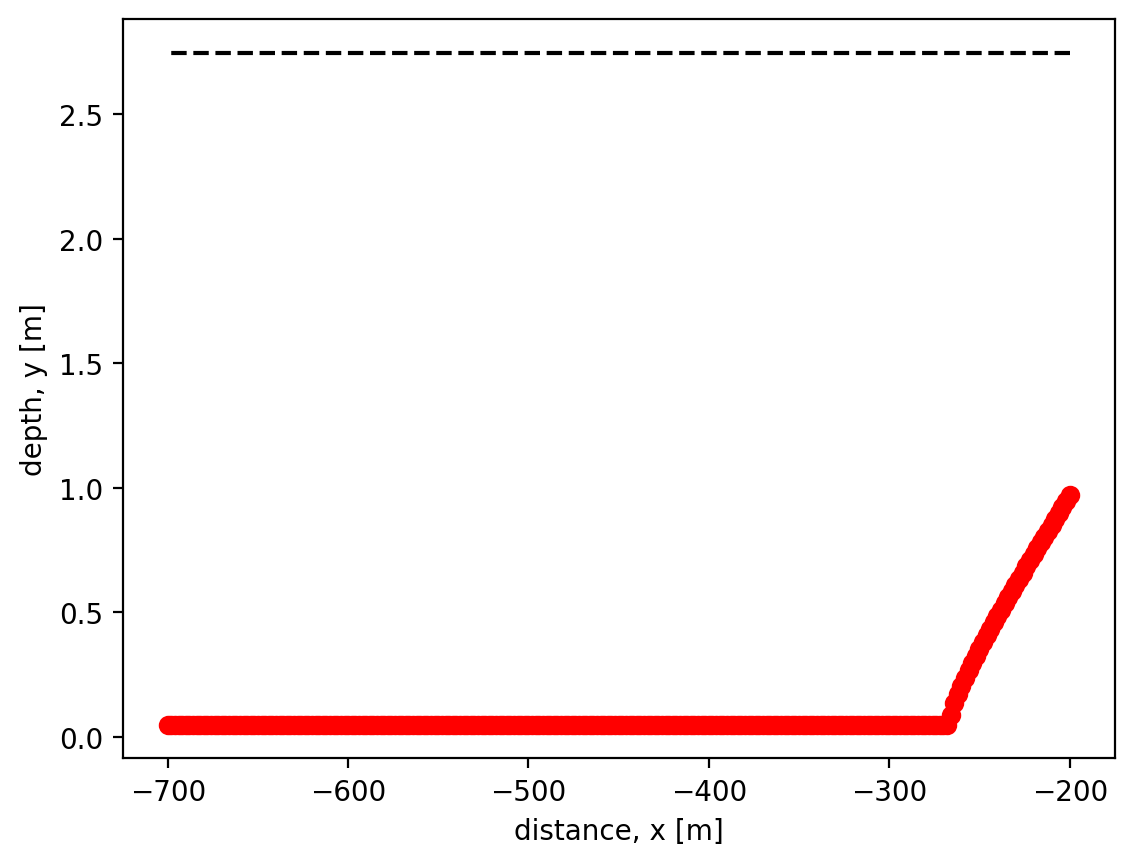

In [552]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, newton
from tabulate import tabulate

#=============================#
#           Inputs            #
#=============================#

#Reach 1
S_o = 0.005
l1 = 500
y_lake1 = 3.5


#Both
b = 10 
n = 0.03
g = 9.81
if g > 10:
    k = 1.486
else:
    k = 1
#=============================#
#                             #
#=============================#

E_c1 = y_lake1
y_c1 = (2/3) * E_c1
Q_c1 = b * (g * y_c1**3)**0.5
q1 = Q_c1 / b

def norm_depth(f, b, k, n, S, Q):
    A = b * f
    P = b + 2 * f
    R = A/P
    return ((k/n) * A * R**(2/3) * S**(0.5) - Q)
fguess = 1
y_o_steep1 = fsolve(norm_depth, fguess, args=(b, k, n, S_o, Q_c1))


def norm_depth_mild(f, b, k, n, S, E):
    A = b * f
    P = b + 2 * f
    R = A/P
    Q = k/n * A * R**(2/3) * S**.5
    return ((f + Q**2 / (2 * g * A**2)) - E)
y_o_mild1 = fsolve(norm_depth_mild, fguess, args=(b, k, n, S_o, E_c1))
Q_mild1 = k/n * (b * y_o_mild1) * ((b * y_o_mild1)/(b + 2 * y_o_mild1))**(2/3) * S_o**.5


if y_o_steep1 < y_c1:
    y_o1 = y_o_steep1
    Q1 = Q_c1
if y_o_steep1 > y_c1:
    y_o1 = y_o_mild1
    Q1 = Q_mild1

def crit(y):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        T = b
    else:
        T = b + 2*m*y
    return Q/np.sqrt(g*A**3/T) - 1
y_c = newton(crit, 0.2)

#######################
# Boundary Conditions #
#######################
y_up = np.round(y_o1[0], 3)
y_dwn = np.round(y_c1, 3)

######################
# Profile Generation #
######################
N = 200
y = np.linspace(y_dwn, y_up, N)

dx = np.zeros(N-1)
x = np.zeros(N)

#Defining area as rec or trap
if m==0:
    A = b * y
else:
    A = (b + m*y) * y

#Defining R as rec or trap
if m==0:
    R = b*y / (b + 2*y)
else:
    R = A / (b + 2*m*y * (1 + m**2)**(1/2))

S_f = (Q*n / (k * A * R**(2/3)))**2
E = y + Q**2 / (2 * g * A**2)

dx = (E[1:] - E[:-1]) / (S_o - 0.5 * (S_f[1:] + S_f[:-1])) #populate dx
dx = dx.flatten()
x_o = 0 #starting point
x[0] = x_o #initialize
x[1:] = dx
x = np.cumsum(x)

eta = -x * S_o
WSE = eta + y

plt.plot(x,eta, 'k-', label='bed')
plt.plot(x,WSE, linestyle='-', color='b', label='WSE')
plt.plot(x[N-1], WSE[N-1], marker='o', color = 'r', label='WSE @ Downstream', linestyle='')
plt.plot(x[1], WSE[1], marker='o', color = 'black', label='WSE @ lake', linestyle='')
plt.legend()
plt.ylabel('Elevation, y (m)')
plt.xlabel('Distance, x (m)')
plt.show()
#=============================#
#           Output            #
#=============================#

print("Critical Depth=", y_c1)
print("Normal Depth =", y_o1)
print("Discharge=", Q1)
print(Q1)

#=============================#
#           Test G            #
#=============================#
N= 250
xstart = -1*200
xup = -1*l1+xstart
x = linspace(xstart,xup,N+1)
yc = y_c
yu = y_o
yd = y_c
y = zeros(N+1)
So = S_o
y[0]=yd #downstream condition
for i in range(1,N+1):
 y[i]=fsolve(dE,y[i-1],args=(x[i-1],x[i],y[i-1]))
y1 = y
x1 = x
yoline=zeros(N+1)
yoline[:]=y_o[0]
plot(x,y, linestyle='-', marker='o', color='r')
plot(x,yoline, 'k--')
ylabel('depth, y [m]')
xlabel('distance, x [m]')
print('Distance to bc =', around(x[N-1],decimals=4))


Distance to the upstream boundary condition (m)= -200.0


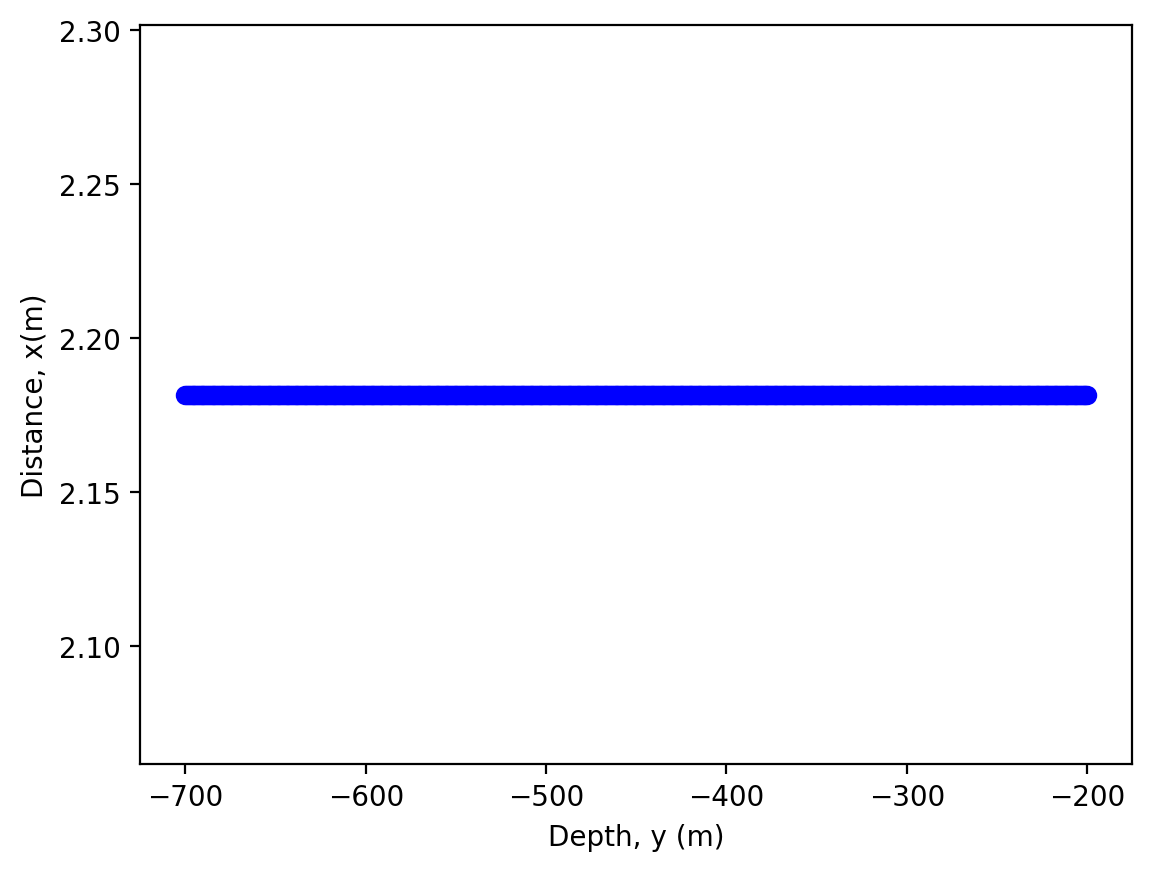

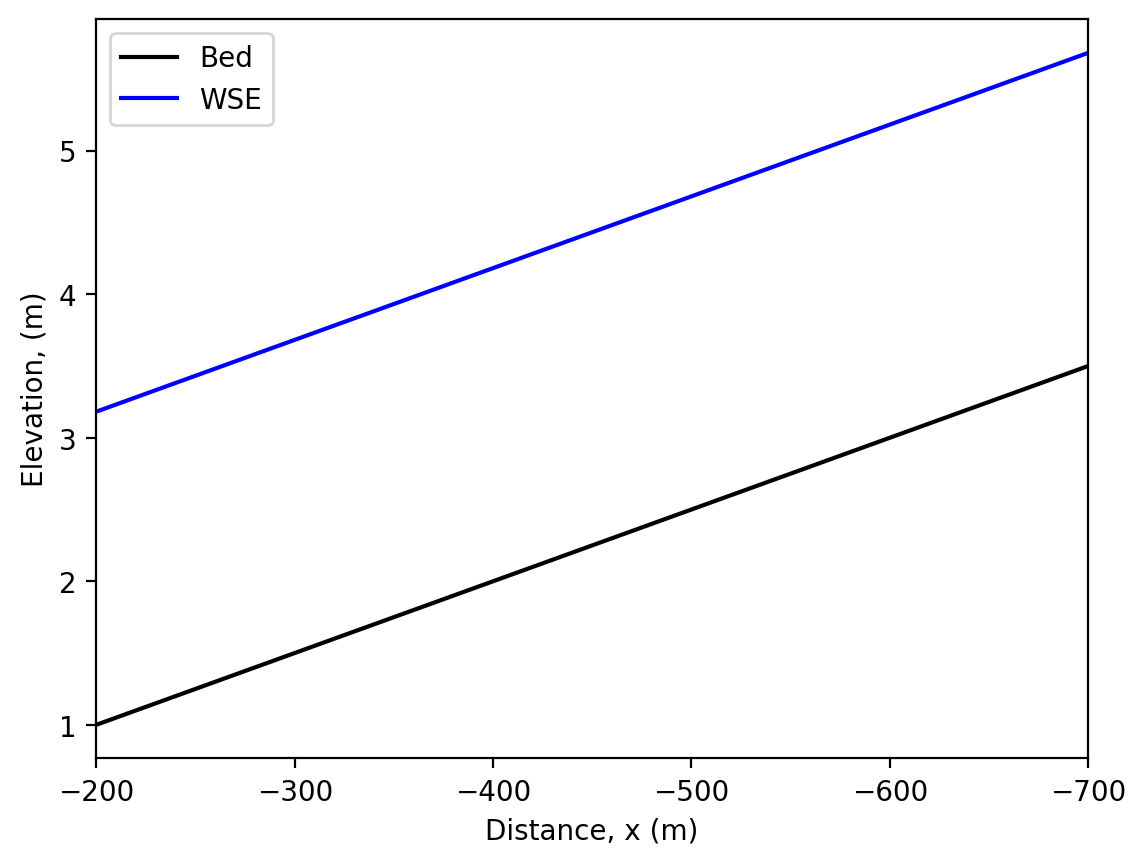

[2.18169504]


In [564]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, newton
from tabulate import tabulate

#=============================#
#           Inputs            #
#=============================#

#Reach 1
S_o = 0.005
l1 = 500
y_lake1 = 3.5

#Both
b = 10 
n = 0.03
g = 9.81
if g > 10:
    k = 1.486
else:
    k = 1
#=============================#
#                             #
#=============================#

E_c1 = y_lake1
y_c1 = (2/3) * E_c1
Q_c1 = b * (g * y_c1**3)**0.5
q1 = Q_c1 / b

def norm_depth(f, b, k, n, S, Q):
    A = b * f
    P = b + 2 * f
    R = A/P
    return ((k/n) * A * R**(2/3) * S**(0.5) - Q)
fguess = 1
y_o_steep1 = fsolve(norm_depth, fguess, args=(b, k, n, S_o, Q_c1))


def norm_depth_mild(f, b, k, n, S, E):
    A = b * f
    P = b + 2 * f
    R = A/P
    Q = k/n * A * R**(2/3) * S**.5
    return ((f + Q**2 / (2 * g * A**2)) - E)
y_o_mild1 = fsolve(norm_depth_mild, fguess, args=(b, k, n, S_o, E_c1))
Q_mild1 = k/n * (b * y_o_mild1) * ((b * y_o_mild1)/(b + 2 * y_o_mild1))**(2/3) * S_o**.5


if y_o_steep1 < y_c1:
    y_o = y_o_steep1
    Q1 = Q_c1
if y_o_steep1 > y_c1:
    y_o = y_o_mild1
    Q1 = Q_mild1

def crit(y):
    if m==0:
        A = b * y
    else:
        A = (b + m*y) * y
    if m==0:
        T = b
    else:
        T = b + 2*m*y
    return Q1/np.sqrt(g*A**3/T) - 1
y_c = newton(crit, 0.2)

#######################
# Boundary Conditions #
#######################    
yu = y_o
yd = y_c
##########################
# Profile initialization #
##########################

N= 500
x = np.linspace(-700, -200, N)
y = np.zeros(N)
y[0]=yd

##########
# Energy #
##########
def dE(y2, x1, x2, y1):
    if m==0:
        A1 = b * y1
    else:
        A1 = (b + m*y1) * y1
    if m==0:
        R1 = b*y1 / (b + 2*y1)
    else:
        R1 = A1 / (b + 2*m*y1 * (1 + m**2)**(1/2))
    Sf1 = (Q1*n / (k * A1 * R1**(2/3)))**2
    E1 = y1 + Q1**2 / (2 * g * A1**2)
    
    if m==0:
        A2 = b * y2
    else:
        A2 = (b + m*y2) * y2
    if m==0:
        R2 = b*y2 / (b + 2*y2)
    else:
        R2 = A2 / (b + 2*m*y2 * (1 + m**2)**(1/2))
    Sf2 = (Q1*n / (k * A2 * R2**(2/3)))**2
    E2 = y2 + Q1**2 / (2 * g * A2**2)
    
    Sfavg=(Sf1 + Sf2)/2
    return(E2 - E1) / (S_o - Sfavg) - (x2 -x1)

######################
# Profile Generation #
######################
for i in range(1, N):
    y[i]= fsolve(dE, y[i-1], args=(x[i-1], x[i], y[i-1]))

################
# Profile Plot #
################
eta = -x *So
WSE = eta + y

print('Distance to the upstream boundary condition (m)=', np.around(x[N-1], decimals=2))

plt.plot(x,y, linestyle='-', marker='o', color='b')
plt.xlabel('Depth, y (m)')
plt.ylabel('Distance, x(m)')
plt.show()

plt.plot(x,eta, '-k', label='Bed')
plt.plot(x,WSE, linestyle='-', color='b', label='WSE')
plt.legend()
plt.ylabel('Elevation, (m)')
plt.xlabel('Distance, x (m)')
plt.xlim(x[N-1], x[0])
plt.show()

print(yd)

---

# Problem 6

Consider flow in a trapezoidal channel that splits around an island (see figure
below). Reach 1 is 1.05 miles long and has a bottom width of b = 10 ft, a side
slope of m = 3, and a Manning n value of n = 0.035. Reach 2 is 0.95 miles
long and has a bottom width of b = 15 ft, a side slope of m = 2, and a Manning
n value of n = 0.03. Answer the following questions for a total discharge in
the river (at section A or B) of Q = 400 cfs, a 2 ft drop in the elevation of the
bed between A and B, and a specific energy at B of 5.1 ft.

    a. What is the discharge in Reach 1 and 2?
    
    b. What is the depth and velocity mid way through each of the two reaches?
    
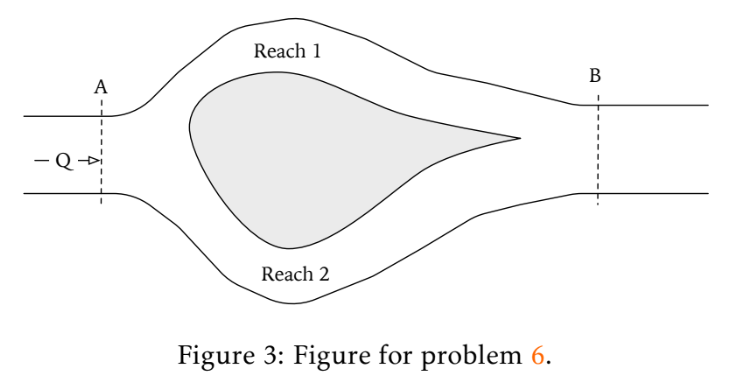

## 6a. What is the discharge in Reach 1 and 2?

CLOSEST ATTEMPT

In [540]:
import numpy as np
from scipy.optimize import fsolve

# Reach 1
l1 = 1000
b1 = 2
m1 = 2
n1 = 0.016
S1 = 0.00036

# Reach 2
l2 = 900
b2 = 3
m2 = 2
n2 = 0.013
S2 = 0.0004

Q = 30
E_fin = 1.98
g = 9.81

# Q array
N = 200

Q1 = np.linspace(1, 29, N)
Q2 = 30 - Q1

# End Conditions
def y_end(f, b, m, Q, g, E):
    A = (b + m * f) * f
    return f + Q**2 / (2 * g * A**2) - E

# Initialize arrays with zeros
y1_end_array = np.zeros_like(Q1)
y2_end_array = np.zeros_like(Q2)

# Use fsolve for each value in Q1
for i in range(N):
    y1_end_array[i] = fsolve(y_end, 1.5, args=(b1, m1, Q1[i], g, E_fin))

# Use fsolve for each value in Q2
for i in range(N):
    y2_end_array[i] = fsolve(y_end, 1.5, args=(b2, m2, Q2[i], g, E_fin))

# print("Reach 1, Flow Depth at End Condition:", y1_end_array)
# print("Reach 2, Flow Depth at End Condition:", y2_end_array)

A1 =  (b + m * y1_end_array) * y1_end_array
A2 =  (b + m * y2_end_array) * y2_end_array

E1_start = y1_end_array + Q1**2 / (2 * g * A1**2)
E2_start = y2_end_array + Q1**2 / (2 * g * A2**2)
E_delta = np.abs(E1_start - E2_start)

min_index = np.argmin(E_delta)

# print(min_index)
print("Reach 1 Discharge =", around(Q1[min_index], decimals=2))
print("Reach 2 Discharge =", around(Q2[min_index], decimals=2))
# print(E1_start[min_index])
# print(E2_start[min_index])

Reach 1 Discharge = 13.8
Reach 2 Discharge = 16.2


## 6b. What is the depth and velocity mid way through each of the two reaches?

In [541]:
E1_start_fin = E1_start[min_index]
E2_start_fin = E2_start[min_index]
Q1 = Q1[min_index]
Q2 = Q2[min_index]

def E_to_depth(y, b, m, Q, E):
    A = (b + m * y) * y
    return (y - Q**2 / (2 * g * A**2)) - E
yguess= 1.5
y1_start=fsolve(E_to_depth, yguess, args=(b1, m1, Q1, E1_start_fin))
y2_start= fsolve(E_to_depth, yguess, args=(b2, m2, Q2, E2_start_fin))
y1_end= fsolve(E_to_depth, yguess, args=(b1, m1, Q1, E_fin))
y2_end= fsolve(E_to_depth, yguess, args=(b2, m2, Q2, E_fin))

y1_array = np.linspace(y1_start, y1_end, N)
y2_array = np.linspace(y1_start, y1_end, N)

y1_mid = y1_array[100]
y2_mid = y2_array[100]


A1= (b1 + m1 * y1_mid) * y1_mid
A2=(b2 + m2 * y2_mid) * y2_mid
v1 = Q1 / A1
v2 = Q2 / A2

print("Depth at Midpoint in Reach 1", np.round(y1_mid, 2))
print("Depth at Midpoint in Reach 2", np.round(y2_mid, 2))
print("Velocity at Midpoint in Reach 1", np.round(v1, 2))
print("Velocity at Midpoint in Reach 2", np.round(v2, 2))

# E1_array = np.linspace(E1_start, E_fin, N)
# E2_array = np.linspace(E2_start, E_fin, N)
# x1_array = np.linspace(0, l1, N)
# x2_array = np.linspace(0, l2, N)

# def sf_avg():
#     A = (b + m * y) * y
#     R = A / (b + 2*m*y * (1 + m**2)**(1/2))
#     Sf = (Q * n / (k * A * R**(2/3)))**2
#     Sf_avg = sum(Sf) / len(Sf)
    
    
    
#     return(x + (Ei - E) / (So - Sf_avg))-xi
    

# def spef_energy():
#     A = (b + m * y) * y
#     return (y - Q**2 / (2 * g * A**2)) - E




Depth at Midpoint in Reach 1 [2.02]
Depth at Midpoint in Reach 2 [2.02]
Velocity at Midpoint in Reach 1 [1.13]
Velocity at Midpoint in Reach 2 [1.14]
